In [1]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

@jit(forceobj=True)
def ler_output(nome_arquivo, num_nos):
  file = open(nome_arquivo, 'r')
  lines = file.readlines() 
  values = []
  invalidos = []
  feromonios = []
  for line in lines:
    numeros = line.split(' ')
    matriz_feromonios = []
    prox = 2
    for i in range(num_nos):
      matriz_feromonios.append([])
      for j in range(num_nos):
        matriz_feromonios[i].append(float(numeros[prox]))
        prox+=1
    invalidos.append(float(numeros[1]))
    values.append(float(numeros[0]))
    feromonios.append(np.array(matriz_feromonios))
  return values, feromonios, invalidos

# Experimentação para a primeira entrada

## Experimentação para o número de formigas

In [2]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes99_finais = []
    for i in [100, 250, 500, 750, 1000, 1500]:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        for j in range(20):
            v, m, inv = ler_output("outputs/num_formigas_entrada1/output_" + str(i) + "_" + str(j) + ".txt", 100)
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
            matriz0_final.append(m[0])
            matriz4_final.append(m[4])
            matriz19_final.append(m[19])
            matriz99_final.append(m[99])
        
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes99_finais.append(getMeanArray(matriz99_final))
    return valores, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes99_finais, invalidos

valores, matrizes0, matrizes4, matrizes19, matrizes99, invalidos = getValoresFormiga()

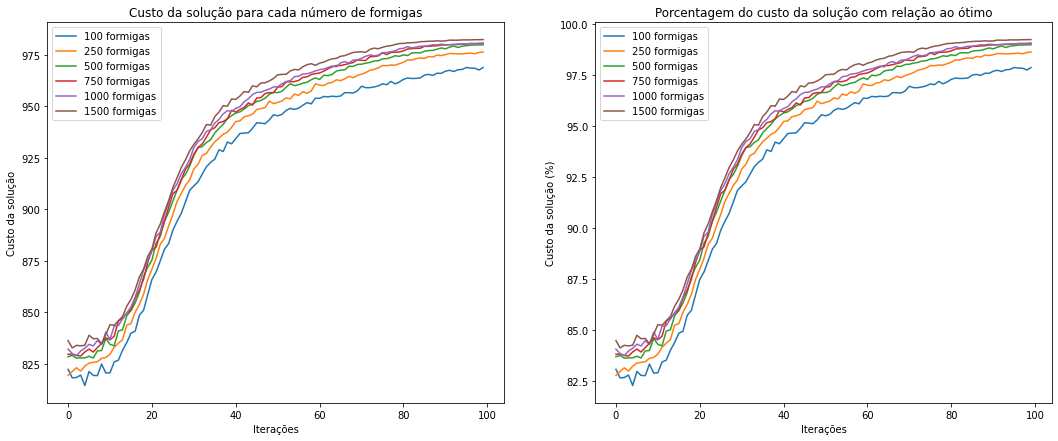

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(valores[0], label='100 formigas')
ax[0].plot(valores[1], label='250 formigas')
ax[0].plot(valores[2], label='500 formigas')
ax[0].plot(valores[3], label='750 formigas')
ax[0].plot(valores[4], label='1000 formigas')
ax[0].plot(valores[5], label='1500 formigas')
ax[0].set_xlabel("Iterações")
ax[0].set_ylabel("Custo da solução")
ax[0].set_title("Custo da solução para cada número de formigas")
ax[0].legend()
ax[1].plot(np.divide(valores[0], 990)*100, label='100 formigas')
ax[1].plot(np.divide(valores[1], 990)*100, label='250 formigas')
ax[1].plot(np.divide(valores[2], 990)*100, label='500 formigas')
ax[1].plot(np.divide(valores[3], 990)*100, label='750 formigas')
ax[1].plot(np.divide(valores[4], 990)*100, label='1000 formigas')
ax[1].plot(np.divide(valores[5], 990)*100, label='1500 formigas')
ax[1].set_xlabel("Iterações")
ax[1].set_ylabel("Custo da solução (%)")
ax[1].set_title("Porcentagem do custo da solução com relação ao ótimo")
ax[1].legend()
plt.show()

In [4]:
print('Solução 100 formigas =', valores[0][-1])
print('Solução 250 formigas =', valores[1][-1])
print('Solução 500 formigas =', valores[2][-1])
print('Solução 750 formigas =', valores[3][-1])
print('Solução 1000 formigas =', valores[4][-1])
print('Solução 1500 formigas =', valores[5][-1])

Solução 100 formigas = 968.8
Solução 250 formigas = 976.4
Solução 500 formigas = 979.85
Solução 750 formigas = 980.7
Solução 1000 formigas = 980.45
Solução 1500 formigas = 982.4


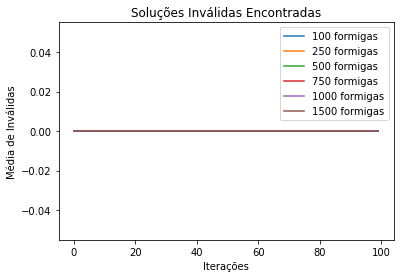

In [5]:
plt.plot(invalidos[0], label='100 formigas')
plt.plot(invalidos[1], label='250 formigas')
plt.plot(invalidos[2], label='500 formigas')
plt.plot(invalidos[3], label='750 formigas')
plt.plot(invalidos[4], label='1000 formigas')
plt.plot(invalidos[5], label='1500 formigas')
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

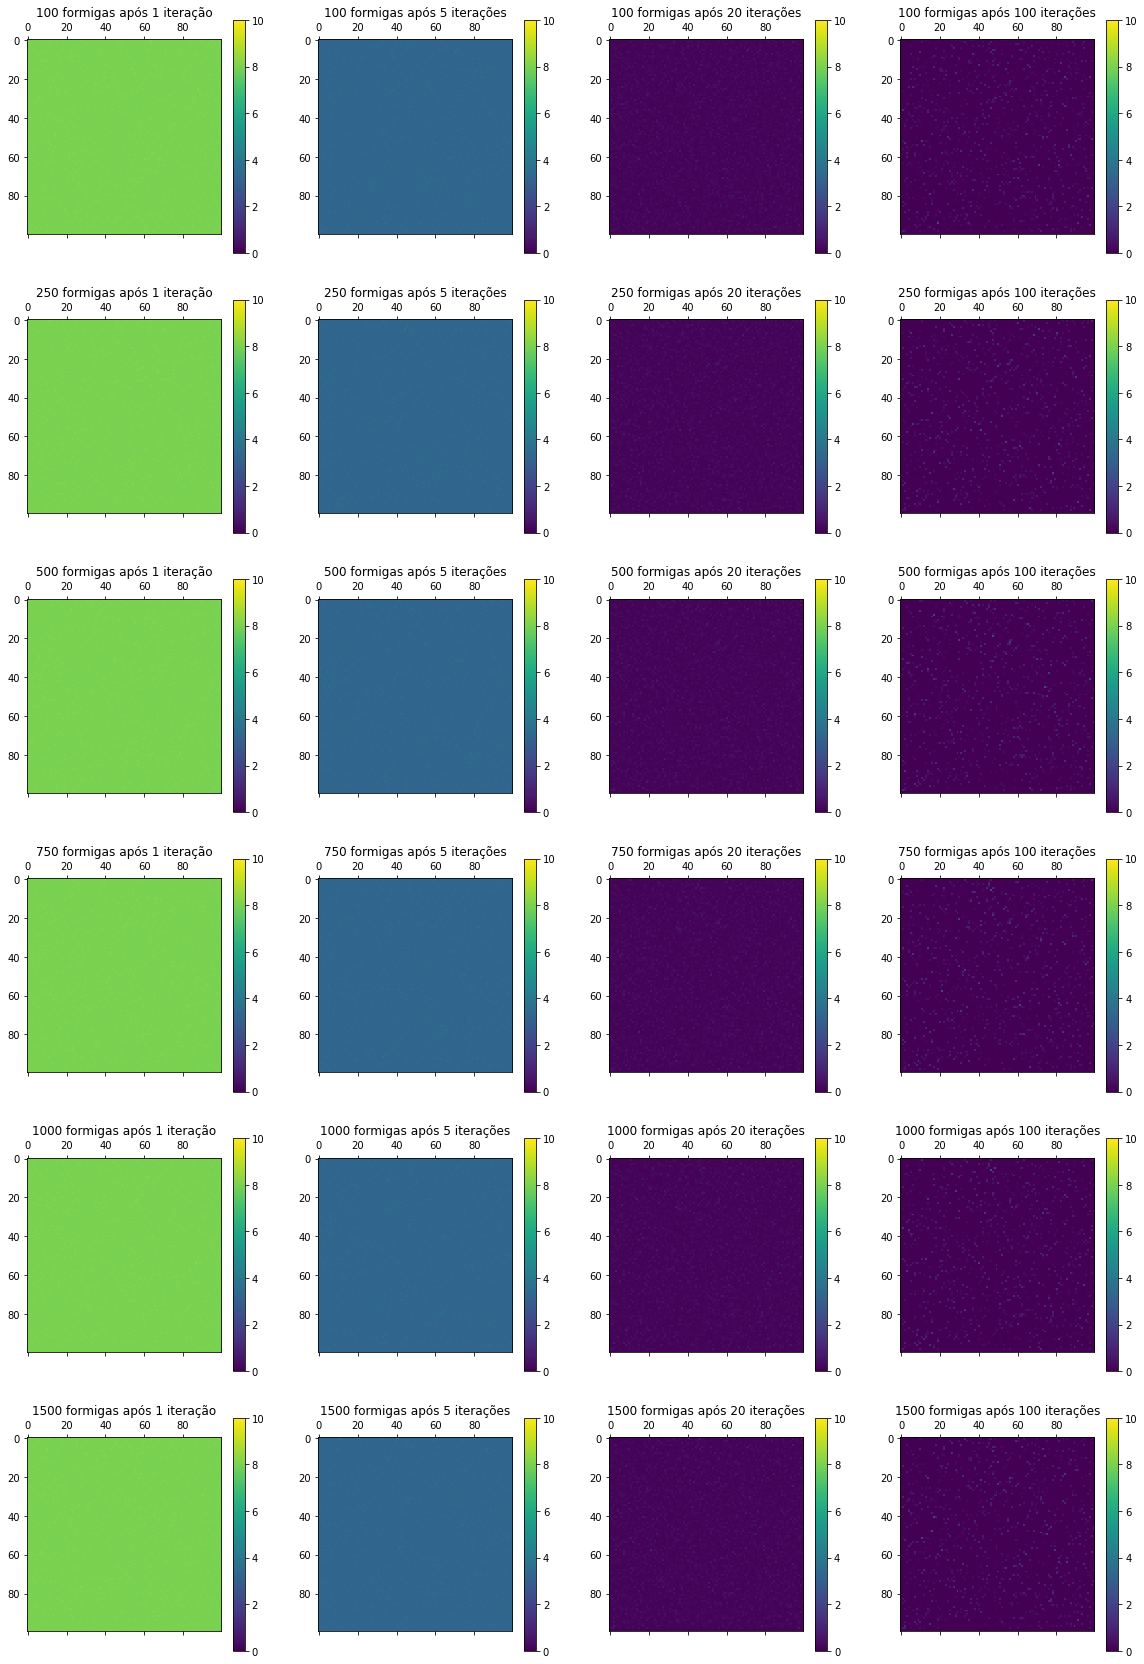

In [35]:
fig, ax = plt.subplots(6, 4, figsize=(20, 30))

m1 = ax[0][0].matshow(matrizes0[0], vmin=0, vmax=10)
ax[0][0].set_title('100 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[0][0])

m2 = ax[0][1].matshow(matrizes4[0], vmin=0, vmax=10)
ax[0][1].set_title('100 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[0][1])

m3 = ax[0][2].matshow(matrizes19[0], vmin=0, vmax=10)
ax[0][2].set_title('100 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[0][2])

m4 = ax[0][3].matshow(matrizes99[0], vmin=0, vmax=10)
ax[0][3].set_title('100 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[0][3])

m1 = ax[1][0].matshow(matrizes0[1], vmin=0, vmax=10)
ax[1][0].set_title('250 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[1][0])

m2 = ax[1][1].matshow(matrizes4[1], vmin=0, vmax=10)
ax[1][1].set_title('250 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[1][1])

m3 = ax[1][2].matshow(matrizes19[1], vmin=0, vmax=10)
ax[1][2].set_title('250 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[1][2])

m4 = ax[1][3].matshow(matrizes99[1], vmin=0, vmax=10)
ax[1][3].set_title('250 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[1][3])

m1 = ax[2][0].matshow(matrizes0[2], vmin=0, vmax=10)
ax[2][0].set_title('500 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[2][0])

m2 = ax[2][1].matshow(matrizes4[2], vmin=0, vmax=10)
ax[2][1].set_title('500 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[2][1])

m3 = ax[2][2].matshow(matrizes19[2], vmin=0, vmax=10)
ax[2][2].set_title('500 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[2][2])

m4 = ax[2][3].matshow(matrizes99[2], vmin=0, vmax=10)
ax[2][3].set_title('500 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[2][3])

m1 = ax[3][0].matshow(matrizes0[3], vmin=0, vmax=10)
ax[3][0].set_title('750 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[3][0])

m2 = ax[3][1].matshow(matrizes4[3], vmin=0, vmax=10)
ax[3][1].set_title('750 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[3][1])

m3 = ax[3][2].matshow(matrizes19[3], vmin=0, vmax=10)
ax[3][2].set_title('750 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[3][2])

m4 = ax[3][3].matshow(matrizes99[3], vmin=0, vmax=10)
ax[3][3].set_title('750 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[3][3])

m1 = ax[4][0].matshow(matrizes0[4], vmin=0, vmax=10)
ax[4][0].set_title('1000 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[4][0])

m2 = ax[4][1].matshow(matrizes4[4], vmin=0, vmax=10)
ax[4][1].set_title('1000 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[4][1])

m3 = ax[4][2].matshow(matrizes19[4], vmin=0, vmax=10)
ax[4][2].set_title('1000 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[4][2])

m4 = ax[4][3].matshow(matrizes99[4], vmin=0, vmax=10)
ax[4][3].set_title('1000 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[4][3])

m1 = ax[5][0].matshow(matrizes0[5], vmin=0, vmax=10)
ax[5][0].set_title('1500 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[5][0])

m2 = ax[5][1].matshow(matrizes4[5], vmin=0, vmax=10)
ax[5][1].set_title('1500 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[5][1])

m3 = ax[5][2].matshow(matrizes19[5], vmin=0, vmax=10)
ax[5][2].set_title('1500 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[5][2])

m4 = ax[5][3].matshow(matrizes99[5], vmin=0, vmax=10)
ax[5][3].set_title('1500 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[5][3])

plt.show()

## Experimentação para o número de iterações

In [11]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores_formiga = []
    invalidos_formiga = []
    matriz0_final = []
    matriz4_final = []
    matriz19_final = []
    matriz99_final = []
    matriz199_final = []
    matriz999_final = []
    for j in range(20):
        v, m, inv = ler_output("outputs/num_iter_entrada1/output_500_" + str(j) + ".txt", 100)
        valores_formiga.append(v)
        invalidos_formiga.append(inv)
        matriz0_final.append(m[0])
        matriz4_final.append(m[4])
        matriz19_final.append(m[19])
        matriz99_final.append(m[99])
        matriz199_final.append(m[199])
        matriz999_final.append(m[999])
    
    return getMeanArray(valores_formiga), getMeanArray(invalidos_formiga), getMeanArray(matriz0_final), getMeanArray(matriz4_final), getMeanArray(matriz19_final), getMeanArray(matriz99_final), getMeanArray(matriz199_final), getMeanArray(matriz999_final)

valores, invalidos, matrizes0, matrizes4, matrizes19, matrizes99, matrizes199, matrizes999 = getValoresFormiga()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


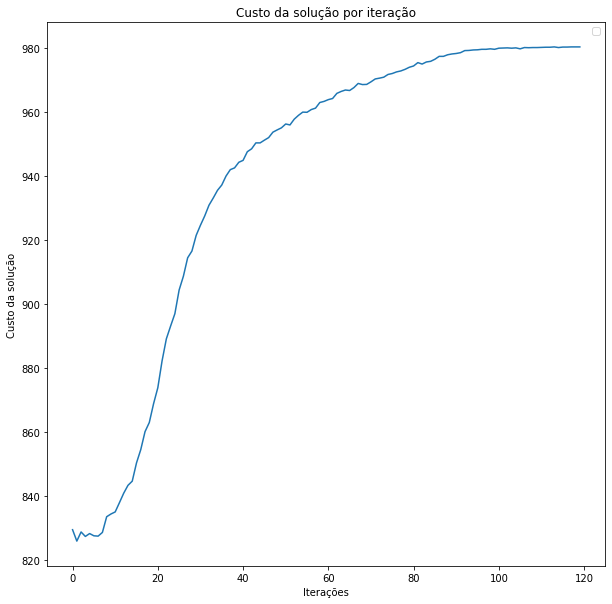

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(valores[:200])
ax[0].set_xlabel("Iterações")
ax[0].set_ylabel("Custo da solução")
ax[0].set_title("Custo da solução por iteração")
ax[0].legend()
ax[1].plot(np.divide(valores[:200], 990)*100)
ax[1].set_xlabel("Iterações")
ax[1].set_ylabel("Custo da solução (%)")
ax[1].set_title("Porcentagem do custo da solução com relação ao ótimo")
ax[1].legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


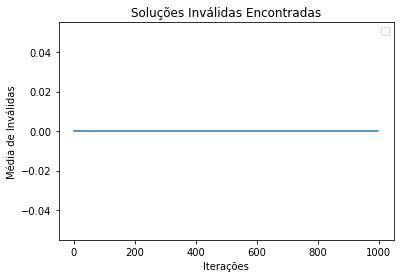

In [ ]:
plt.plot(invalidos)
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

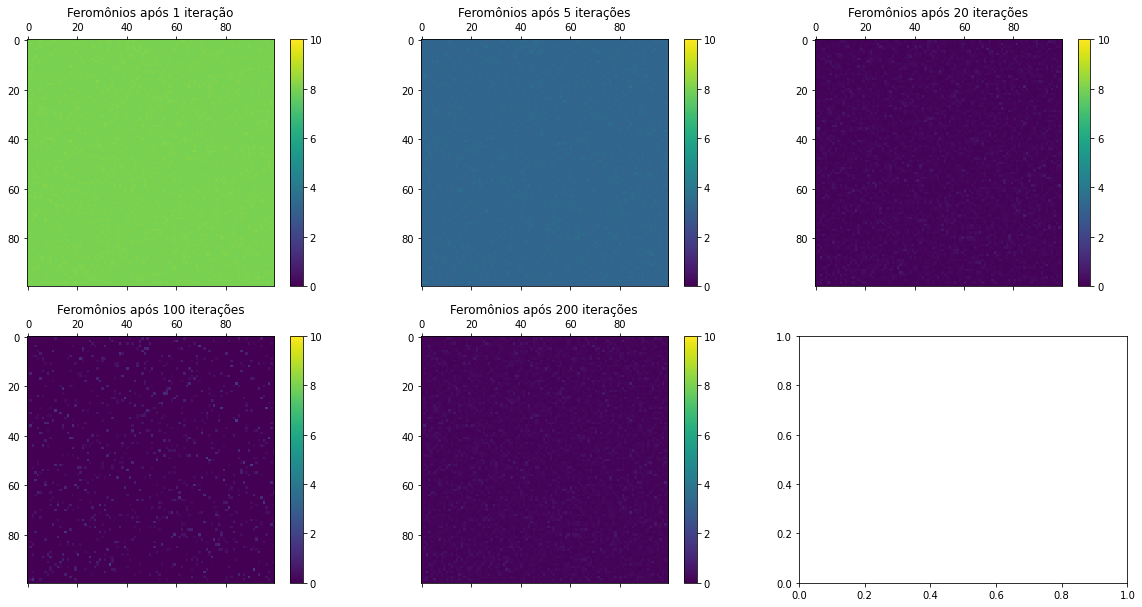

In [52]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

m1 = ax[0][0].matshow(matrizes0, vmin=0, vmax=10)
ax[0][0].set_title('Feromônios após 1 iteração')
plt.colorbar(m1, ax=ax[0][0])

m2 = ax[0][1].matshow(matrizes4, vmin=0, vmax=10)
ax[0][1].set_title('Feromônios após 5 iterações')
plt.colorbar(m2, ax=ax[0][1])

m3 = ax[0][2].matshow(matrizes19, vmin=0, vmax=10)
ax[0][2].set_title('Feromônios após 20 iterações')
plt.colorbar(m3, ax=ax[0][2])

m4 = ax[1][0].matshow(matrizes99, vmin=0, vmax=10)
ax[1][0].set_title('Feromônios após 100 iterações')
plt.colorbar(m4, ax=ax[1][0])

m5 = ax[1][1].matshow(matrizes19, vmin=0, vmax=10)
ax[1][1].set_title('Feromônios após 200 iterações')
plt.colorbar(m5, ax=ax[1][1])

m6 = ax[1][2].matshow(matrizes99, vmin=0, vmax=10)
ax[1][2].set_title('Feromônios após 1000 iterações')
plt.colorbar(m6, ax=ax[1][2])

plt.show()

In [ ]:
print('Solução 30 iterações =', valores[29])
print('Solução 50 iterações =', valores[49])
print('Solução 100 iterações =', valores[99])
print('Solução 110 iterações =', valores[109]
print('Solução 120 iterações =', valores[119])
print('Solução 200 iterações =', valores[199]))
print('Solução 500 iterações =', valores[499])
print('Solução 750 iterações =', valores[749])
print('Solução 1000 iterações =', valores[999])

Solução 100 iterações = 979.5
Solução 120 iterações = 980.25
Solução 250 iterações = 980.25
Solução 500 iterações = 980.25
Solução 750 iterações = 980.25
Solução 1000 iterações = 980.25


## Experimentação para a taxa de evaporação

In [3]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes119_finais = []
    for i in ['0.050000', '0.150000', '0.200000', '0.250000', '0.500000', '0.750000']:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        for j in range(20):
            v, m, inv = ler_output("outputs/taxa_evap_entrada1/output_" + str(i) + "_" + str(j) + ".txt", 100)
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
            matriz0_final.append(m[0])
            matriz4_final.append(m[4])
            matriz19_final.append(m[19])
            matriz99_final.append(m[119])
        
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes119_finais.append(getMeanArray(matriz99_final))
    return valores, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes119_finais, invalidos

valores, matrizes0, matrizes4, matrizes19, matrizes119, invalidos = getValoresFormiga()

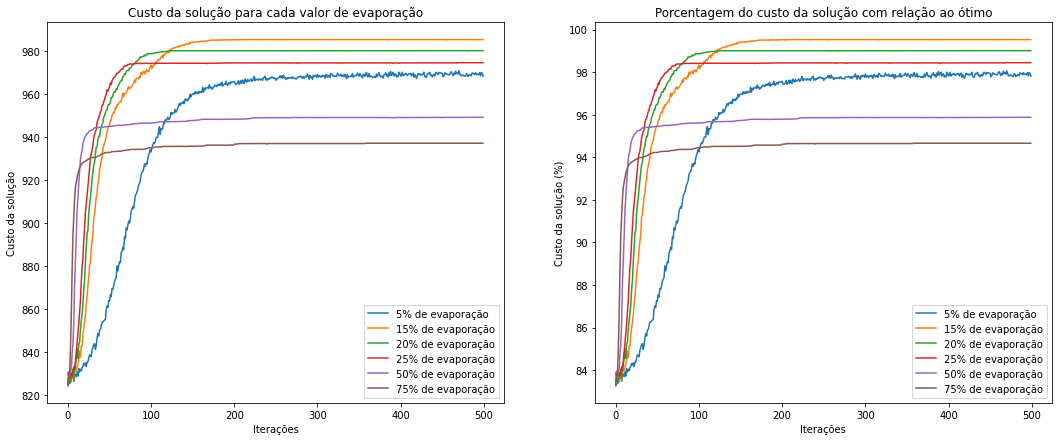

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(valores[0], label="5% de evaporação")
ax[0].plot(valores[1], label="15% de evaporação")
ax[0].plot(valores[2], label="20% de evaporação")
ax[0].plot(valores[3], label="25% de evaporação")
ax[0].plot(valores[4], label="50% de evaporação")
ax[0].plot(valores[5], label="75% de evaporação")
ax[0].set_xlabel("Iterações")
ax[0].set_ylabel("Custo da solução")
ax[0].set_title("Custo da solução para cada valor de evaporação")
ax[0].legend()
ax[1].plot(np.divide(valores[0], 990)*100, label="5% de evaporação")
ax[1].plot(np.divide(valores[1], 990)*100, label="15% de evaporação")
ax[1].plot(np.divide(valores[2], 990)*100, label="20% de evaporação")
ax[1].plot(np.divide(valores[3], 990)*100, label="25% de evaporação")
ax[1].plot(np.divide(valores[4], 990)*100, label="50% de evaporação")
ax[1].plot(np.divide(valores[5], 990)*100, label="75% de evaporação")
ax[1].set_xlabel("Iterações")
ax[1].set_ylabel("Custo da solução (%)")
ax[1].set_title("Porcentagem do custo da solução com relação ao ótimo")
ax[1].legend()
plt.show()

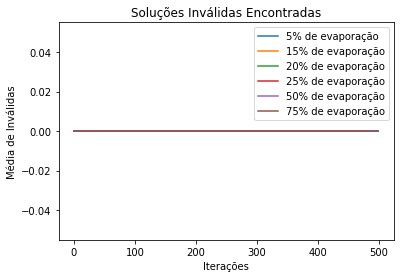

In [5]:
plt.plot(invalidos[0], label="5% de evaporação")
plt.plot(invalidos[1], label="15% de evaporação")
plt.plot(invalidos[2], label="20% de evaporação")
plt.plot(invalidos[3], label="25% de evaporação")
plt.plot(invalidos[4], label="50% de evaporação")
plt.plot(invalidos[5], label="75% de evaporação")
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

In [6]:
print('Solução 5% de evaporação =', valores[0][-1])
print('Solução 15% de evaporação =', valores[1][-1])
print('Solução 20% de evaporação =', valores[2][-1])
print('Solução 25% de evaporação =', valores[3][-1])
print('Solução 50% de evaporação =', valores[4][-1])
print('Solução 75% de evaporação =', valores[5][-1])

Solução 5% de evaporação = 968.3
Solução 15% de evaporação = 985.35
Solução 20% de evaporação = 980.2
Solução 25% de evaporação = 974.6
Solução 50% de evaporação = 949.2
Solução 75% de evaporação = 937.15


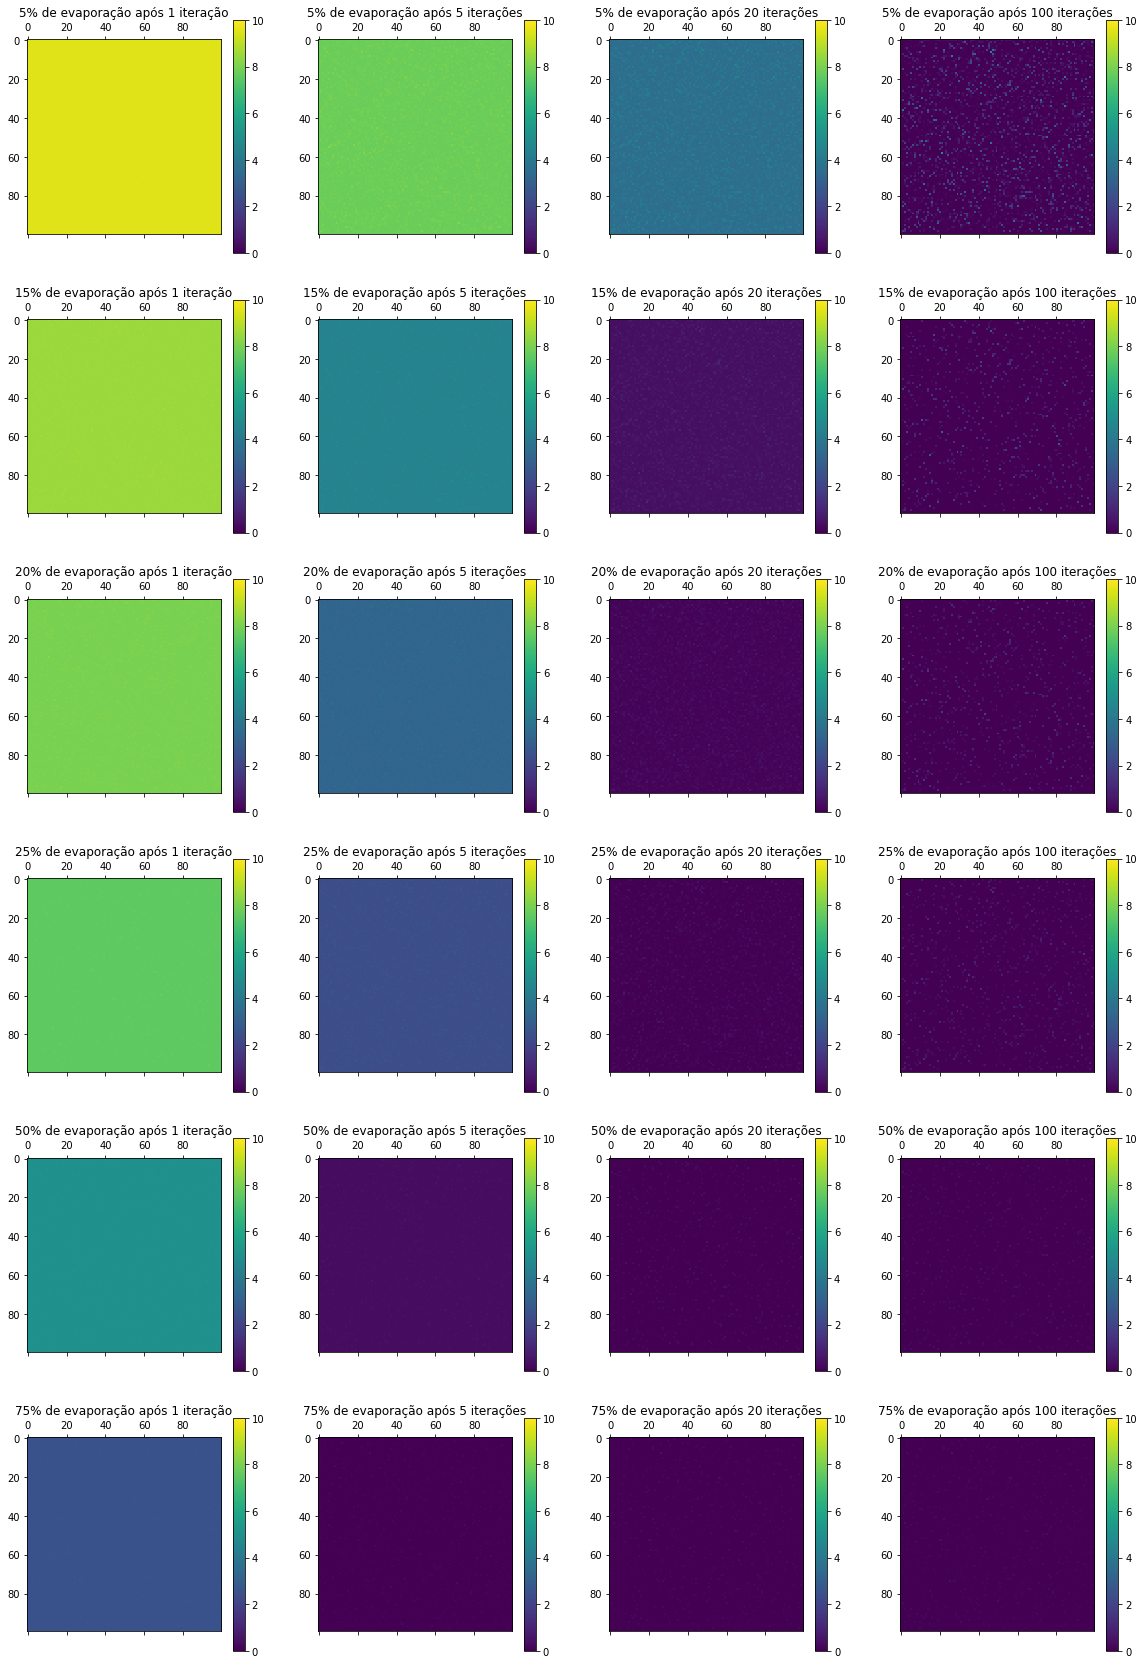

In [8]:
fig, ax = plt.subplots(6, 4, figsize=(20, 30))

m1 = ax[0][0].matshow(matrizes0[0], vmin=0, vmax=10)
ax[0][0].set_title('5% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[0][0])

m2 = ax[0][1].matshow(matrizes4[0], vmin=0, vmax=10)
ax[0][1].set_title('5% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[0][1])

m3 = ax[0][2].matshow(matrizes19[0], vmin=0, vmax=10)
ax[0][2].set_title('5% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[0][2])

m4 = ax[0][3].matshow(matrizes119[0], vmin=0, vmax=10)
ax[0][3].set_title('5% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[0][3])

m1 = ax[1][0].matshow(matrizes0[1], vmin=0, vmax=10)
ax[1][0].set_title('15% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[1][0])

m2 = ax[1][1].matshow(matrizes4[1], vmin=0, vmax=10)
ax[1][1].set_title('15% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[1][1])

m3 = ax[1][2].matshow(matrizes19[1], vmin=0, vmax=10)
ax[1][2].set_title('15% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[1][2])

m4 = ax[1][3].matshow(matrizes119[1], vmin=0, vmax=10)
ax[1][3].set_title('15% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[1][3])

m1 = ax[2][0].matshow(matrizes0[2], vmin=0, vmax=10)
ax[2][0].set_title('20% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[2][0])

m2 = ax[2][1].matshow(matrizes4[2], vmin=0, vmax=10)
ax[2][1].set_title('20% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[2][1])

m3 = ax[2][2].matshow(matrizes19[2], vmin=0, vmax=10)
ax[2][2].set_title('20% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[2][2])

m4 = ax[2][3].matshow(matrizes119[2], vmin=0, vmax=10)
ax[2][3].set_title('20% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[2][3])

m1 = ax[3][0].matshow(matrizes0[3], vmin=0, vmax=10)
ax[3][0].set_title('25% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[3][0])

m2 = ax[3][1].matshow(matrizes4[3], vmin=0, vmax=10)
ax[3][1].set_title('25% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[3][1])

m3 = ax[3][2].matshow(matrizes19[3], vmin=0, vmax=10)
ax[3][2].set_title('25% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[3][2])

m4 = ax[3][3].matshow(matrizes119[3], vmin=0, vmax=10)
ax[3][3].set_title('25% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[3][3])

m1 = ax[4][0].matshow(matrizes0[4], vmin=0, vmax=10)
ax[4][0].set_title('50% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[4][0])

m2 = ax[4][1].matshow(matrizes4[4], vmin=0, vmax=10)
ax[4][1].set_title('50% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[4][1])

m3 = ax[4][2].matshow(matrizes19[4], vmin=0, vmax=10)
ax[4][2].set_title('50% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[4][2])

m4 = ax[4][3].matshow(matrizes119[4], vmin=0, vmax=10)
ax[4][3].set_title('50% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[4][3])

m1 = ax[5][0].matshow(matrizes0[5], vmin=0, vmax=10)
ax[5][0].set_title('75% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[5][0])

m2 = ax[5][1].matshow(matrizes4[5], vmin=0, vmax=10)
ax[5][1].set_title('75% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[5][1])

m3 = ax[5][2].matshow(matrizes19[5], vmin=0, vmax=10)
ax[5][2].set_title('75% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[5][2])

m4 = ax[5][3].matshow(matrizes119[5], vmin=0, vmax=10)
ax[5][3].set_title('75% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[5][3])

plt.show()

## Experimentação para os valores de alfa e beta

In [17]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes119_finais = []
    for i in [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        for j in range(20):
            v, m, inv = ler_output("outputs/alfa_beta_entrada1/output_" + str(i[0]) + "_" + str(i[1]) + "_" + str(j) + ".txt", 100)
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
            matriz0_final.append(m[0])
            matriz4_final.append(m[4])
            matriz19_final.append(m[19])
            matriz99_final.append(m[119])
        
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes119_finais.append(getMeanArray(matriz99_final))
    return valores, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes119_finais, invalidos

valores, matrizes0, matrizes4, matrizes19, matrizes119, invalidos = getValoresFormiga()

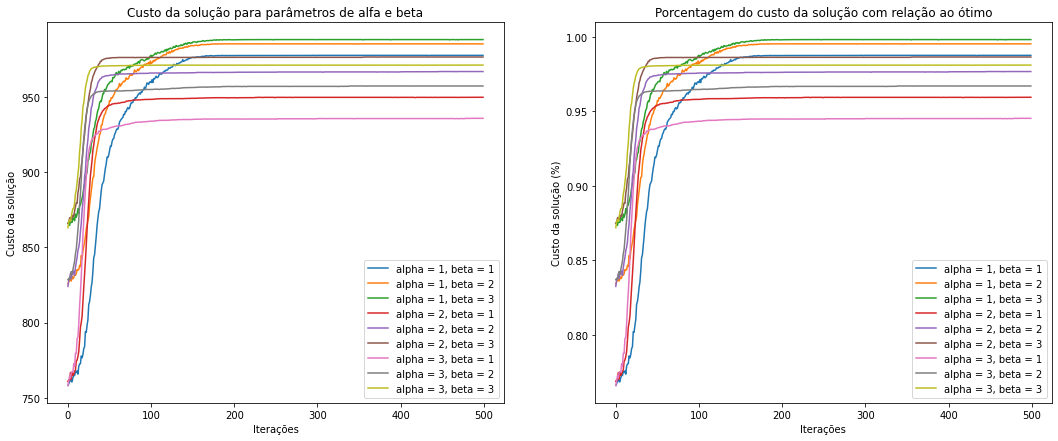

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(valores[0], label="alpha = 1, beta = 1")
ax[0].plot(valores[1], label="alpha = 1, beta = 2")
ax[0].plot(valores[2], label="alpha = 1, beta = 3")
ax[0].plot(valores[3], label="alpha = 2, beta = 1")
ax[0].plot(valores[4], label="alpha = 2, beta = 2")
ax[0].plot(valores[5], label="alpha = 2, beta = 3")
ax[0].plot(valores[6], label="alpha = 3, beta = 1")
ax[0].plot(valores[7], label="alpha = 3, beta = 2")
ax[0].plot(valores[8], label="alpha = 3, beta = 3")
ax[0].set_xlabel("Iterações")
ax[0].set_ylabel("Custo da solução")
ax[0].set_title("Custo da solução para parâmetros de alfa e beta")
ax[0].legend()
ax[1].plot(np.divide(valores[0], 990), label="alpha = 1, beta = 1")
ax[1].plot(np.divide(valores[1], 990), label="alpha = 1, beta = 2")
ax[1].plot(np.divide(valores[2], 990), label="alpha = 1, beta = 3")
ax[1].plot(np.divide(valores[3], 990), label="alpha = 2, beta = 1")
ax[1].plot(np.divide(valores[4], 990), label="alpha = 2, beta = 2")
ax[1].plot(np.divide(valores[5], 990), label="alpha = 2, beta = 3")
ax[1].plot(np.divide(valores[6], 990), label="alpha = 3, beta = 1")
ax[1].plot(np.divide(valores[7], 990), label="alpha = 3, beta = 2")
ax[1].plot(np.divide(valores[8], 990), label="alpha = 3, beta = 3")
ax[1].set_xlabel("Iterações")
ax[1].set_ylabel("Custo da solução (%)")
ax[1].set_title("Porcentagem do custo da solução com relação ao ótimo")
ax[1].legend()
plt.show()

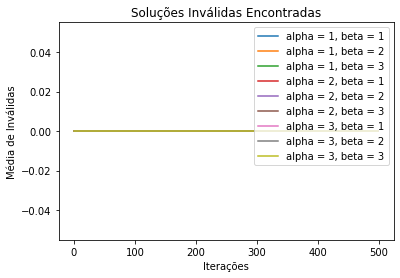

In [23]:
plt.plot(invalidos[0], label="alpha = 1, beta = 1")
plt.plot(invalidos[1], label="alpha = 1, beta = 2")
plt.plot(invalidos[2], label="alpha = 1, beta = 3")
plt.plot(invalidos[3], label="alpha = 2, beta = 1")
plt.plot(invalidos[4], label="alpha = 2, beta = 2")
plt.plot(invalidos[5], label="alpha = 2, beta = 3")
plt.plot(invalidos[6], label="alpha = 3, beta = 1")
plt.plot(invalidos[7], label="alpha = 3, beta = 2")
plt.plot(invalidos[8], label="alpha = 3, beta = 3")
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

In [24]:
print('Solução alfa = 1, beta = 1:', valores[0][-1])
print('Solução alfa = 1, beta = 2:', valores[1][-1])
print('Solução alfa = 1, beta = 3:', valores[2][-1])
print('Solução alfa = 2, beta = 1:', valores[3][-1])
print('Solução alfa = 2, beta = 2:', valores[4][-1])
print('Solução alfa = 2, beta = 3:', valores[5][-1])
print('Solução alfa = 3, beta = 1:', valores[6][-1])
print('Solução alfa = 3, beta = 2:', valores[7][-1])
print('Solução alfa = 3, beta = 3:', valores[8][-1])

Solução alfa = 1, beta = 1: 977.6
Solução alfa = 1, beta = 2: 985.25
Solução alfa = 1, beta = 3: 988.1
Solução alfa = 2, beta = 1: 949.75
Solução alfa = 2, beta = 2: 966.85
Solução alfa = 2, beta = 3: 976.5
Solução alfa = 3, beta = 1: 935.75
Solução alfa = 3, beta = 2: 957.25
Solução alfa = 3, beta = 3: 971.15


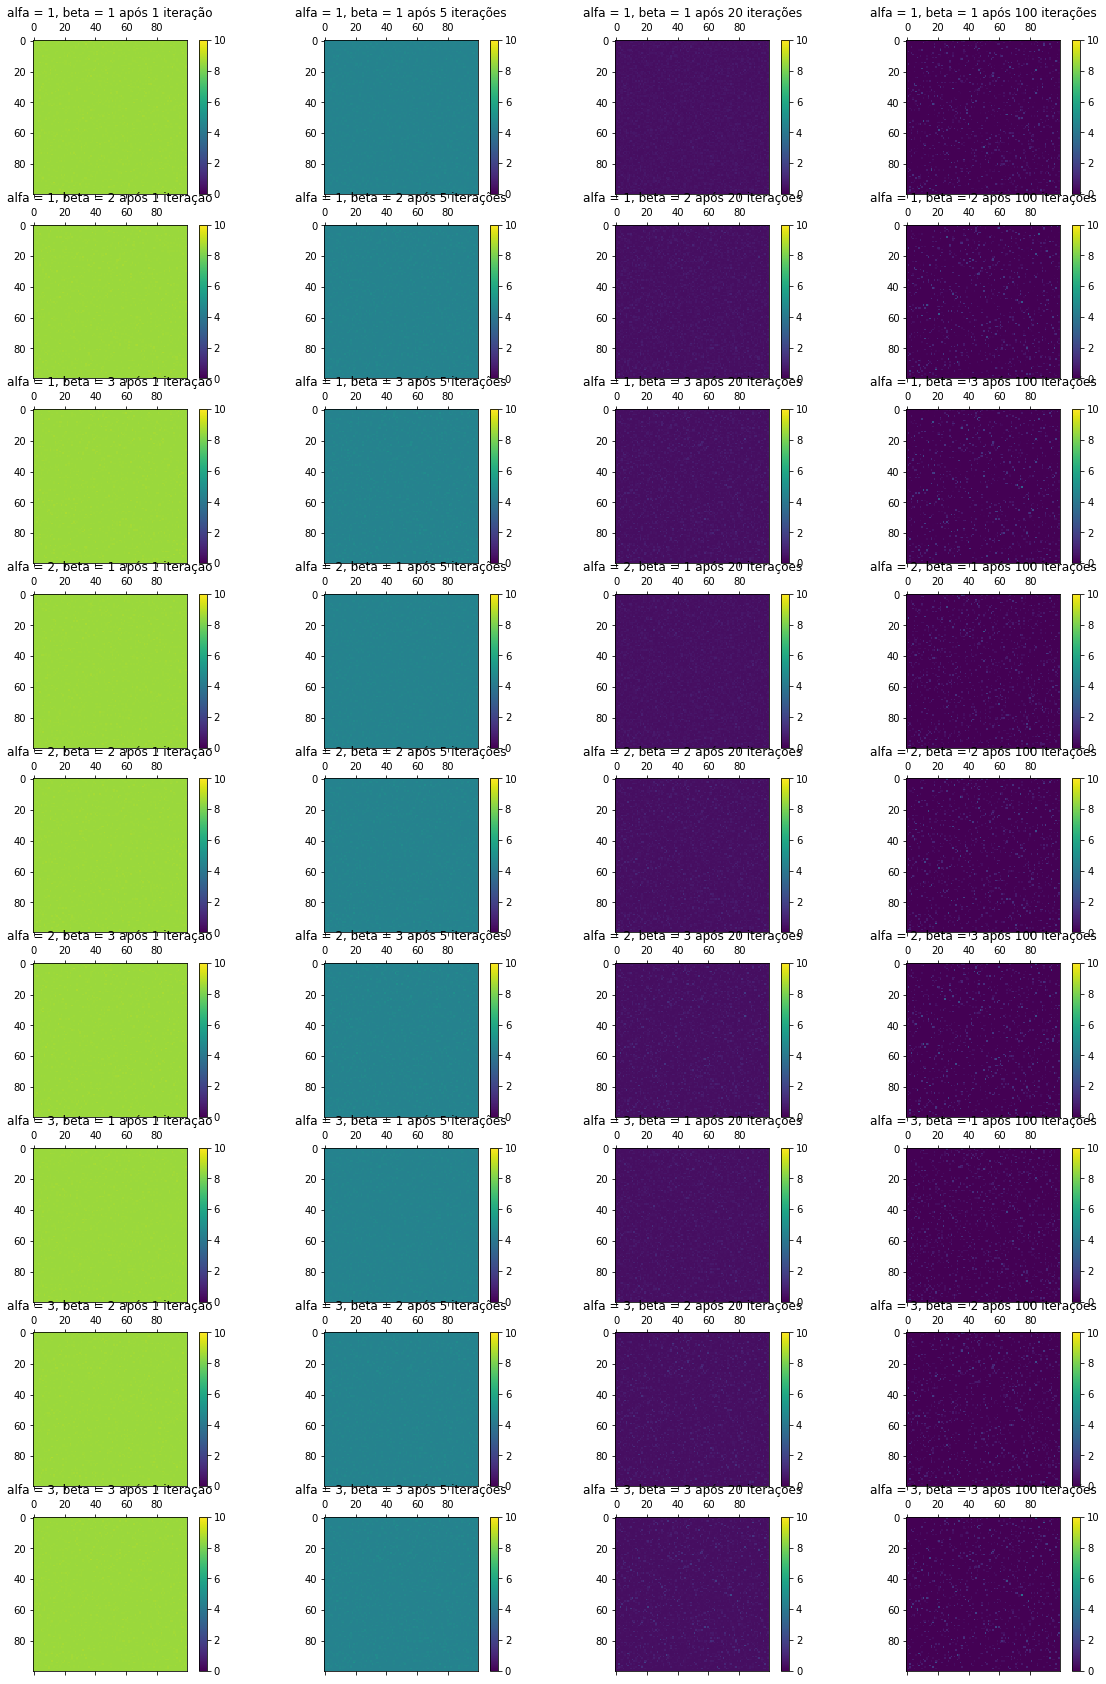

In [25]:
fig, ax = plt.subplots(9, 4, figsize=(20, 30))

m1 = ax[0][0].matshow(matrizes0[0], vmin=0, vmax=10)
ax[0][0].set_title('alfa = 1, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[0][0])

m2 = ax[0][1].matshow(matrizes4[0], vmin=0, vmax=10)
ax[0][1].set_title('alfa = 1, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[0][1])

m3 = ax[0][2].matshow(matrizes19[0], vmin=0, vmax=10)
ax[0][2].set_title('alfa = 1, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[0][2])

m4 = ax[0][3].matshow(matrizes119[0], vmin=0, vmax=10)
ax[0][3].set_title('alfa = 1, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[0][3])

m1 = ax[1][0].matshow(matrizes0[1], vmin=0, vmax=10)
ax[1][0].set_title('alfa = 1, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[1][0])

m2 = ax[1][1].matshow(matrizes4[1], vmin=0, vmax=10)
ax[1][1].set_title('alfa = 1, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[1][1])

m3 = ax[1][2].matshow(matrizes19[1], vmin=0, vmax=10)
ax[1][2].set_title('alfa = 1, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[1][2])

m4 = ax[1][3].matshow(matrizes119[1], vmin=0, vmax=10)
ax[1][3].set_title('alfa = 1, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[1][3])

m1 = ax[2][0].matshow(matrizes0[2], vmin=0, vmax=10)
ax[2][0].set_title('alfa = 1, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[2][0])

m2 = ax[2][1].matshow(matrizes4[2], vmin=0, vmax=10)
ax[2][1].set_title('alfa = 1, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[2][1])

m3 = ax[2][2].matshow(matrizes19[2], vmin=0, vmax=10)
ax[2][2].set_title('alfa = 1, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[2][2])

m4 = ax[2][3].matshow(matrizes119[2], vmin=0, vmax=10)
ax[2][3].set_title('alfa = 1, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[2][3])

m1 = ax[3][0].matshow(matrizes0[3], vmin=0, vmax=10)
ax[3][0].set_title('alfa = 2, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[3][0])

m2 = ax[3][1].matshow(matrizes4[3], vmin=0, vmax=10)
ax[3][1].set_title('alfa = 2, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[3][1])

m3 = ax[3][2].matshow(matrizes19[3], vmin=0, vmax=10)
ax[3][2].set_title('alfa = 2, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[3][2])

m4 = ax[3][3].matshow(matrizes119[3], vmin=0, vmax=10)
ax[3][3].set_title('alfa = 2, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[3][3])

m1 = ax[4][0].matshow(matrizes0[4], vmin=0, vmax=10)
ax[4][0].set_title('alfa = 2, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[4][0])

m2 = ax[4][1].matshow(matrizes4[4], vmin=0, vmax=10)
ax[4][1].set_title('alfa = 2, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[4][1])

m3 = ax[4][2].matshow(matrizes19[4], vmin=0, vmax=10)
ax[4][2].set_title('alfa = 2, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[4][2])

m4 = ax[4][3].matshow(matrizes119[4], vmin=0, vmax=10)
ax[4][3].set_title('alfa = 2, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[4][3])

m1 = ax[5][0].matshow(matrizes0[5], vmin=0, vmax=10)
ax[5][0].set_title('alfa = 2, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[5][0])

m2 = ax[5][1].matshow(matrizes4[5], vmin=0, vmax=10)
ax[5][1].set_title('alfa = 2, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[5][1])

m3 = ax[5][2].matshow(matrizes19[5], vmin=0, vmax=10)
ax[5][2].set_title('alfa = 2, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[5][2])

m4 = ax[5][3].matshow(matrizes119[5], vmin=0, vmax=10)
ax[5][3].set_title('alfa = 2, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[5][3])

m1 = ax[6][0].matshow(matrizes0[6], vmin=0, vmax=10)
ax[6][0].set_title('alfa = 3, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[6][0])

m2 = ax[6][1].matshow(matrizes4[6], vmin=0, vmax=10)
ax[6][1].set_title('alfa = 3, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[6][1])

m3 = ax[6][2].matshow(matrizes19[6], vmin=0, vmax=10)
ax[6][2].set_title('alfa = 3, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[6][2])

m4 = ax[6][3].matshow(matrizes119[6], vmin=0, vmax=10)
ax[6][3].set_title('alfa = 3, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[6][3])

m1 = ax[7][0].matshow(matrizes0[7], vmin=0, vmax=10)
ax[7][0].set_title('alfa = 3, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[7][0])

m2 = ax[7][1].matshow(matrizes4[7], vmin=0, vmax=10)
ax[7][1].set_title('alfa = 3, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[7][1])

m3 = ax[7][2].matshow(matrizes19[7], vmin=0, vmax=10)
ax[7][2].set_title('alfa = 3, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[7][2])

m4 = ax[7][3].matshow(matrizes119[7], vmin=0, vmax=10)
ax[7][3].set_title('alfa = 3, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[7][3])

m1 = ax[8][0].matshow(matrizes0[8], vmin=0, vmax=10)
ax[8][0].set_title('alfa = 3, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[8][0])

m2 = ax[8][1].matshow(matrizes4[8], vmin=0, vmax=10)
ax[8][1].set_title('alfa = 3, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[8][1])

m3 = ax[8][2].matshow(matrizes19[8], vmin=0, vmax=10)
ax[8][2].set_title('alfa = 3, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[8][2])

m4 = ax[8][3].matshow(matrizes119[8], vmin=0, vmax=10)
ax[8][3].set_title('alfa = 3, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[8][3])

plt.show()

# Experimentação para a Segunda Entrada

## Número de Formigas

In [26]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes99_finais = []
    for i in [10, 25, 50, 100, 250, 500]:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        for j in range(30):
            v, m, inv = ler_output("outputs/num_formigas_entrada2/output_" + str(i) + "_" + str(j) + ".txt", 20)
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
            matriz0_final.append(m[0])
            matriz4_final.append(m[4])
            matriz19_final.append(m[19])
            matriz99_final.append(m[99])
        
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes99_finais.append(getMeanArray(matriz99_final))
    return valores, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes99_finais, invalidos

valores, matrizes0, matrizes4, matrizes19, matrizes99, invalidos = getValoresFormiga()

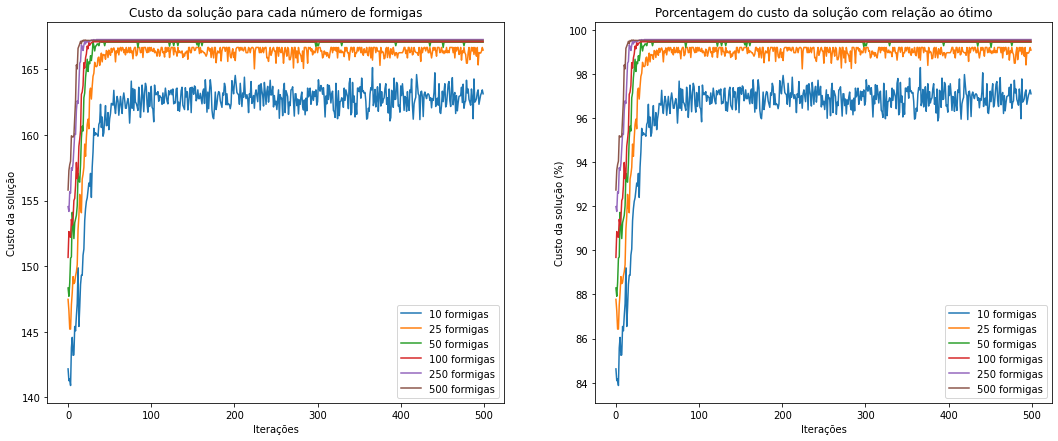

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(valores[0], label='10 formigas')
ax[0].plot(valores[1], label='25 formigas')
ax[0].plot(valores[2], label='50 formigas')
ax[0].plot(valores[3], label='100 formigas')
ax[0].plot(valores[4], label='250 formigas')
ax[0].plot(valores[5], label='500 formigas')
ax[0].set_xlabel("Iterações")
ax[0].set_ylabel("Custo da solução")
ax[0].set_title("Custo da solução para cada número de formigas")
ax[0].legend()
ax[1].plot(np.divide(valores[0], 168)*100, label='10 formigas')
ax[1].plot(np.divide(valores[1], 168)*100, label='25 formigas')
ax[1].plot(np.divide(valores[2], 168)*100, label='50 formigas')
ax[1].plot(np.divide(valores[3], 168)*100, label='100 formigas')
ax[1].plot(np.divide(valores[4], 168)*100, label='250 formigas')
ax[1].plot(np.divide(valores[5], 168)*100, label='500 formigas')
ax[1].set_xlabel("Iterações")
ax[1].set_ylabel("Custo da solução (%)")
ax[1].set_title("Porcentagem do custo da solução com relação ao ótimo")
ax[1].legend()
plt.show()

In [28]:
print('Solução 10 formigas =', valores[0][-1])
print('Solução 25 formigas =', valores[1][-1])
print('Solução 50 formigas =', valores[2][-1])
print('Solução 100 formigas =', valores[3][-1])
print('Solução 250 formigas =', valores[4][-1])
print('Solução 500 formigas =', valores[5][-1])

Solução 10 formigas = 163.13333333333333
Solução 25 formigas = 166.46666666666667
Solução 50 formigas = 167.06666666666666
Solução 100 formigas = 167.1
Solução 250 formigas = 167.26666666666668
Solução 500 formigas = 167.2


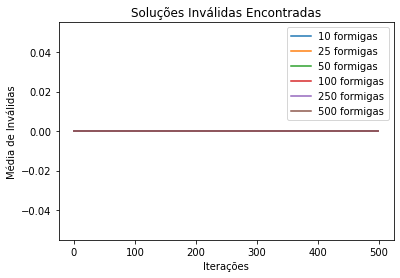

In [29]:
plt.plot(invalidos[0], label='10 formigas')
plt.plot(invalidos[1], label='25 formigas')
plt.plot(invalidos[2], label='50 formigas')
plt.plot(invalidos[3], label='100 formigas')
plt.plot(invalidos[4], label='250 formigas')
plt.plot(invalidos[5], label='500 formigas')
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

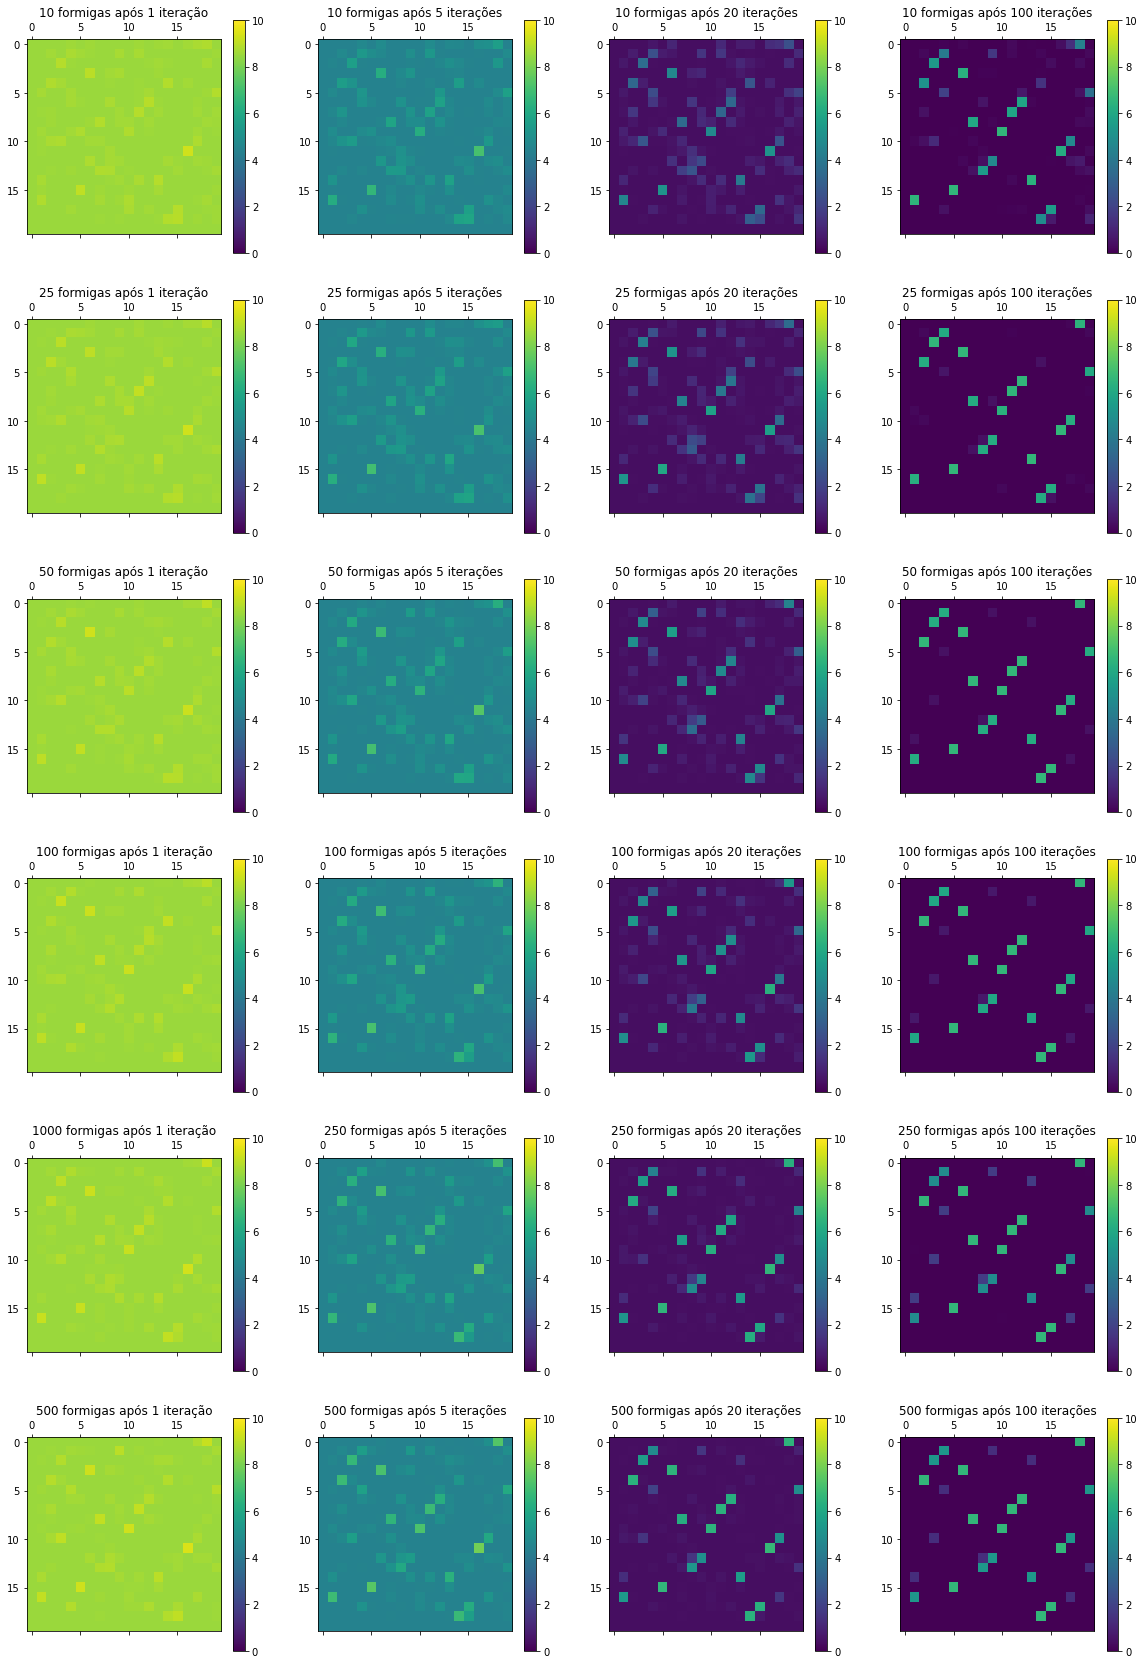

In [30]:
fig, ax = plt.subplots(6, 4, figsize=(20, 30))

m1 = ax[0][0].matshow(matrizes0[0], vmin=0, vmax=10)
ax[0][0].set_title('10 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[0][0])

m2 = ax[0][1].matshow(matrizes4[0], vmin=0, vmax=10)
ax[0][1].set_title('10 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[0][1])

m3 = ax[0][2].matshow(matrizes19[0], vmin=0, vmax=10)
ax[0][2].set_title('10 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[0][2])

m4 = ax[0][3].matshow(matrizes99[0], vmin=0, vmax=10)
ax[0][3].set_title('10 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[0][3])

m1 = ax[1][0].matshow(matrizes0[1], vmin=0, vmax=10)
ax[1][0].set_title('25 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[1][0])

m2 = ax[1][1].matshow(matrizes4[1], vmin=0, vmax=10)
ax[1][1].set_title('25 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[1][1])

m3 = ax[1][2].matshow(matrizes19[1], vmin=0, vmax=10)
ax[1][2].set_title('25 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[1][2])

m4 = ax[1][3].matshow(matrizes99[1], vmin=0, vmax=10)
ax[1][3].set_title('25 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[1][3])

m1 = ax[2][0].matshow(matrizes0[2], vmin=0, vmax=10)
ax[2][0].set_title('50 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[2][0])

m2 = ax[2][1].matshow(matrizes4[2], vmin=0, vmax=10)
ax[2][1].set_title('50 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[2][1])

m3 = ax[2][2].matshow(matrizes19[2], vmin=0, vmax=10)
ax[2][2].set_title('50 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[2][2])

m4 = ax[2][3].matshow(matrizes99[2], vmin=0, vmax=10)
ax[2][3].set_title('50 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[2][3])

m1 = ax[3][0].matshow(matrizes0[3], vmin=0, vmax=10)
ax[3][0].set_title('100 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[3][0])

m2 = ax[3][1].matshow(matrizes4[3], vmin=0, vmax=10)
ax[3][1].set_title('100 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[3][1])

m3 = ax[3][2].matshow(matrizes19[3], vmin=0, vmax=10)
ax[3][2].set_title('100 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[3][2])

m4 = ax[3][3].matshow(matrizes99[3], vmin=0, vmax=10)
ax[3][3].set_title('100 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[3][3])

m1 = ax[4][0].matshow(matrizes0[4], vmin=0, vmax=10)
ax[4][0].set_title('1000 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[4][0])

m2 = ax[4][1].matshow(matrizes4[4], vmin=0, vmax=10)
ax[4][1].set_title('250 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[4][1])

m3 = ax[4][2].matshow(matrizes19[4], vmin=0, vmax=10)
ax[4][2].set_title('250 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[4][2])

m4 = ax[4][3].matshow(matrizes99[4], vmin=0, vmax=10)
ax[4][3].set_title('250 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[4][3])

m1 = ax[5][0].matshow(matrizes0[5], vmin=0, vmax=10)
ax[5][0].set_title('500 formigas após 1 iteração')
plt.colorbar(m1, ax=ax[5][0])

m2 = ax[5][1].matshow(matrizes4[5], vmin=0, vmax=10)
ax[5][1].set_title('500 formigas após 5 iterações')
plt.colorbar(m2, ax=ax[5][1])

m3 = ax[5][2].matshow(matrizes19[5], vmin=0, vmax=10)
ax[5][2].set_title('500 formigas após 20 iterações')
plt.colorbar(m3, ax=ax[5][2])

m4 = ax[5][3].matshow(matrizes99[5], vmin=0, vmax=10)
ax[5][3].set_title('500 formigas após 100 iterações')
plt.colorbar(m4, ax=ax[5][3])

plt.show()

## Taxa de Evaporação

In [2]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes99_finais = []
    for i in ['0.050000', '0.150000', '0.200000', '0.250000', '0.500000', '0.750000']:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        for j in range(30):
            v, m, inv = ler_output("outputs/taxa_evap_entrada2/output_" + str(i) + "_" + str(j) + ".txt", 20)
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
            matriz0_final.append(m[0])
            matriz4_final.append(m[4])
            matriz19_final.append(m[19])
            matriz99_final.append(m[99])
        
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes99_finais.append(getMeanArray(matriz99_final))
    return valores, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes99_finais, invalidos

valores, matrizes0, matrizes4, matrizes19, matrizes99, invalidos = getValoresFormiga()

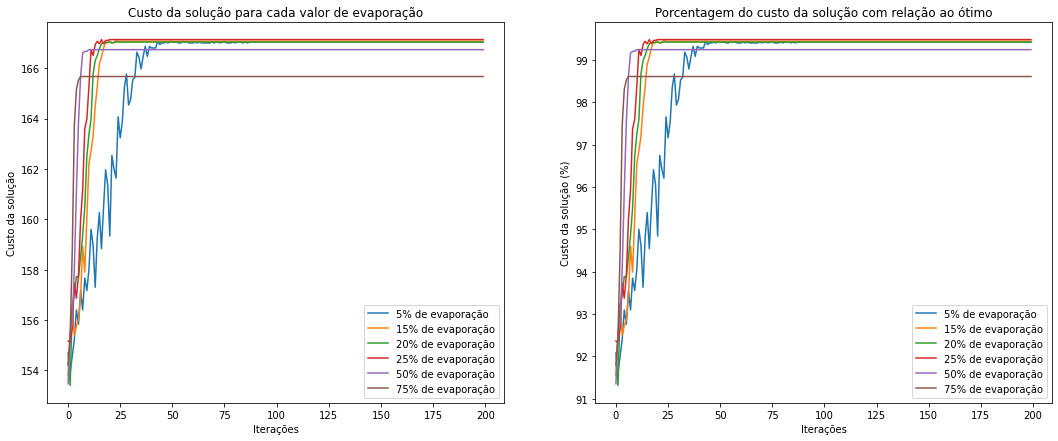

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(valores[0][:200], label="5% de evaporação")
ax[0].plot(valores[1][:200], label="15% de evaporação")
ax[0].plot(valores[2][:200], label="20% de evaporação")
ax[0].plot(valores[3][:200], label="25% de evaporação")
ax[0].plot(valores[4][:200], label="50% de evaporação")
ax[0].plot(valores[5][:200], label="75% de evaporação")
ax[0].set_xlabel("Iterações")
ax[0].set_ylabel("Custo da solução")
ax[0].set_title("Custo da solução para cada valor de evaporação")
ax[0].legend()
ax[1].plot(np.divide(valores[0][:200], 168)*100, label="5% de evaporação")
ax[1].plot(np.divide(valores[1][:200], 168)*100, label="15% de evaporação")
ax[1].plot(np.divide(valores[2][:200], 168)*100, label="20% de evaporação")
ax[1].plot(np.divide(valores[3][:200], 168)*100, label="25% de evaporação")
ax[1].plot(np.divide(valores[4][:200], 168)*100, label="50% de evaporação")
ax[1].plot(np.divide(valores[5][:200], 168)*100, label="75% de evaporação")
ax[1].set_xlabel("Iterações")
ax[1].set_ylabel("Custo da solução (%)")
ax[1].set_title("Porcentagem do custo da solução com relação ao ótimo")
ax[1].legend()
plt.show()

In [4]:
print('Solução 5% formigas =', valores[0][-1])
print('Solução 15% formigas =', valores[1][-1])
print('Solução 20% formigas =', valores[2][-1])
print('Solução 25% formigas =', valores[3][-1])
print('Solução 50% formigas =', valores[4][-1])
print('Solução 75% formigas =', valores[5][-1])

Solução 5% formigas = 167.03333333333333
Solução 15% formigas = 167.06666666666666
Solução 20% formigas = 167.03333333333333
Solução 25% formigas = 167.13333333333333
Solução 50% formigas = 166.73333333333332
Solução 75% formigas = 165.66666666666666


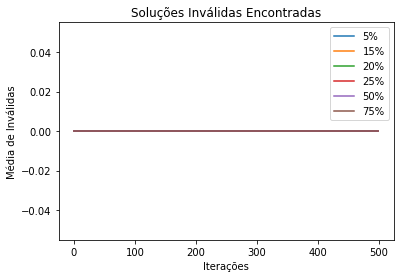

In [5]:
plt.plot(invalidos[0], label='5%')
plt.plot(invalidos[1], label='15%')
plt.plot(invalidos[2], label='20%')
plt.plot(invalidos[3], label='25%')
plt.plot(invalidos[4], label='50%')
plt.plot(invalidos[5], label='75%')
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

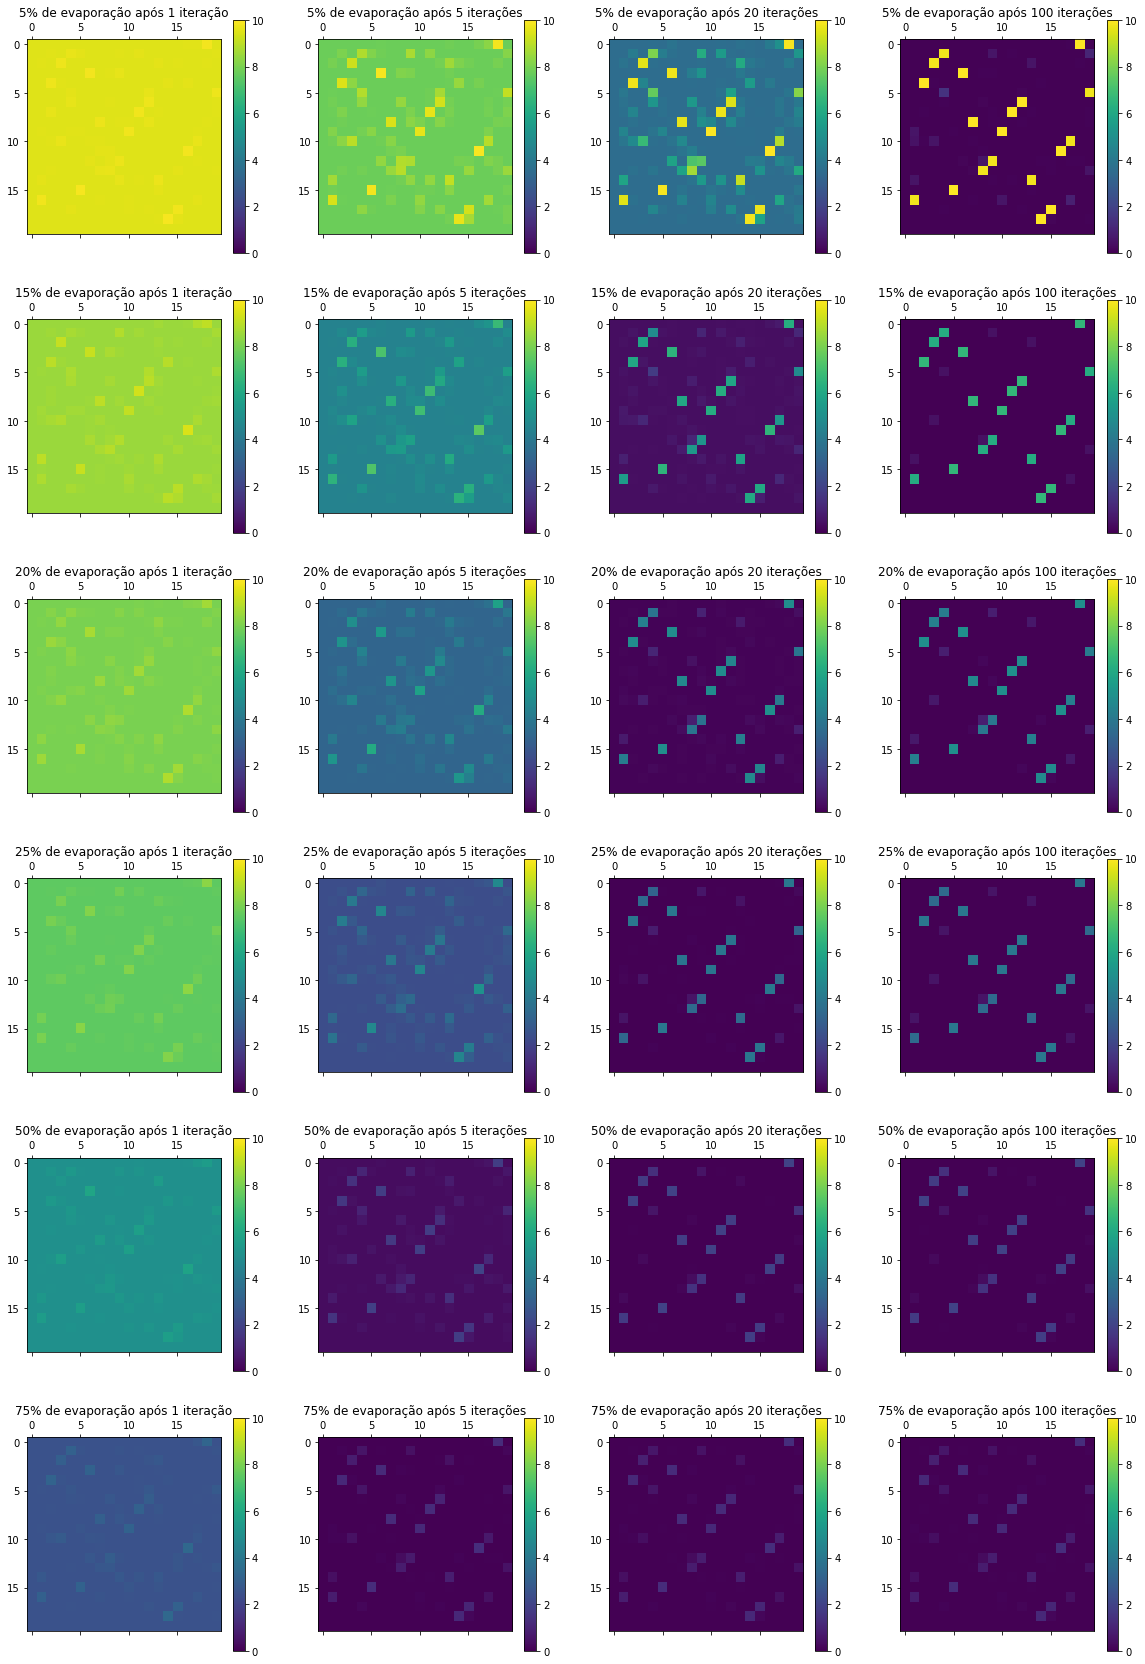

In [6]:
fig, ax = plt.subplots(6, 4, figsize=(20, 30))

m1 = ax[0][0].matshow(matrizes0[0], vmin=0, vmax=10)
ax[0][0].set_title('5% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[0][0])

m2 = ax[0][1].matshow(matrizes4[0], vmin=0, vmax=10)
ax[0][1].set_title('5% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[0][1])

m3 = ax[0][2].matshow(matrizes19[0], vmin=0, vmax=10)
ax[0][2].set_title('5% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[0][2])

m4 = ax[0][3].matshow(matrizes99[0], vmin=0, vmax=10)
ax[0][3].set_title('5% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[0][3])

m1 = ax[1][0].matshow(matrizes0[1], vmin=0, vmax=10)
ax[1][0].set_title('15% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[1][0])

m2 = ax[1][1].matshow(matrizes4[1], vmin=0, vmax=10)
ax[1][1].set_title('15% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[1][1])

m3 = ax[1][2].matshow(matrizes19[1], vmin=0, vmax=10)
ax[1][2].set_title('15% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[1][2])

m4 = ax[1][3].matshow(matrizes99[1], vmin=0, vmax=10)
ax[1][3].set_title('15% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[1][3])

m1 = ax[2][0].matshow(matrizes0[2], vmin=0, vmax=10)
ax[2][0].set_title('20% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[2][0])

m2 = ax[2][1].matshow(matrizes4[2], vmin=0, vmax=10)
ax[2][1].set_title('20% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[2][1])

m3 = ax[2][2].matshow(matrizes19[2], vmin=0, vmax=10)
ax[2][2].set_title('20% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[2][2])

m4 = ax[2][3].matshow(matrizes99[2], vmin=0, vmax=10)
ax[2][3].set_title('20% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[2][3])

m1 = ax[3][0].matshow(matrizes0[3], vmin=0, vmax=10)
ax[3][0].set_title('25% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[3][0])

m2 = ax[3][1].matshow(matrizes4[3], vmin=0, vmax=10)
ax[3][1].set_title('25% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[3][1])

m3 = ax[3][2].matshow(matrizes19[3], vmin=0, vmax=10)
ax[3][2].set_title('25% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[3][2])

m4 = ax[3][3].matshow(matrizes99[3], vmin=0, vmax=10)
ax[3][3].set_title('25% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[3][3])

m1 = ax[4][0].matshow(matrizes0[4], vmin=0, vmax=10)
ax[4][0].set_title('50% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[4][0])

m2 = ax[4][1].matshow(matrizes4[4], vmin=0, vmax=10)
ax[4][1].set_title('50% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[4][1])

m3 = ax[4][2].matshow(matrizes19[4], vmin=0, vmax=10)
ax[4][2].set_title('50% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[4][2])

m4 = ax[4][3].matshow(matrizes99[4], vmin=0, vmax=10)
ax[4][3].set_title('50% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[4][3])

m1 = ax[5][0].matshow(matrizes0[5], vmin=0, vmax=10)
ax[5][0].set_title('75% de evaporação após 1 iteração')
plt.colorbar(m1, ax=ax[5][0])

m2 = ax[5][1].matshow(matrizes4[5], vmin=0, vmax=10)
ax[5][1].set_title('75% de evaporação após 5 iterações')
plt.colorbar(m2, ax=ax[5][1])

m3 = ax[5][2].matshow(matrizes19[5], vmin=0, vmax=10)
ax[5][2].set_title('75% de evaporação após 20 iterações')
plt.colorbar(m3, ax=ax[5][2])

m4 = ax[5][3].matshow(matrizes99[5], vmin=0, vmax=10)
ax[5][3].set_title('75% de evaporação após 100 iterações')
plt.colorbar(m4, ax=ax[5][3])

plt.show()

## Alfa e Beta

In [7]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes119_finais = []
    for i in [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        for j in range(30):
            v, m, inv = ler_output("outputs/alfa_beta_entrada2/output_" + str(i[0]) + "_" + str(i[1]) + "_" + str(j) + ".txt", 20)
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
            matriz0_final.append(m[0])
            matriz4_final.append(m[4])
            matriz19_final.append(m[19])
            matriz99_final.append(m[119])
        
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes119_finais.append(getMeanArray(matriz99_final))
    return valores, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes119_finais, invalidos

valores, matrizes0, matrizes4, matrizes19, matrizes119, invalidos = getValoresFormiga()

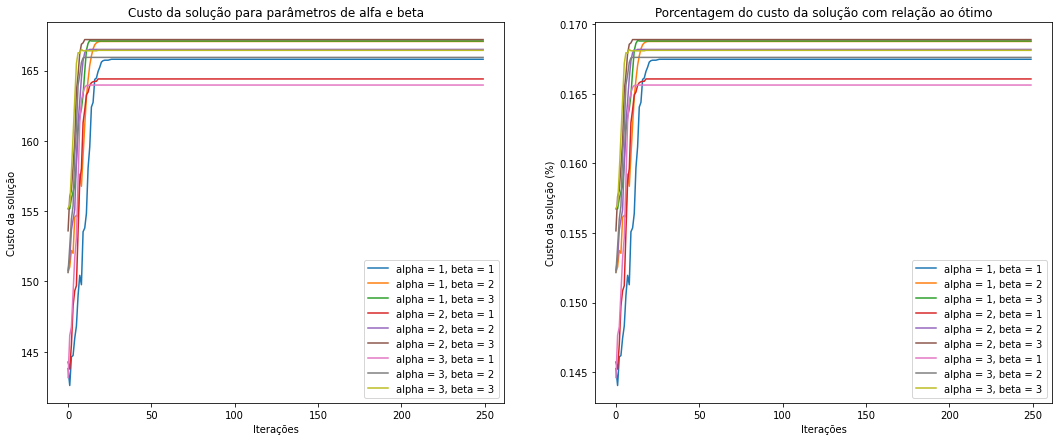

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(valores[0], label="alpha = 1, beta = 1")
ax[0].plot(valores[1], label="alpha = 1, beta = 2")
ax[0].plot(valores[2], label="alpha = 1, beta = 3")
ax[0].plot(valores[3], label="alpha = 2, beta = 1")
ax[0].plot(valores[4], label="alpha = 2, beta = 2")
ax[0].plot(valores[5], label="alpha = 2, beta = 3")
ax[0].plot(valores[6], label="alpha = 3, beta = 1")
ax[0].plot(valores[7], label="alpha = 3, beta = 2")
ax[0].plot(valores[8], label="alpha = 3, beta = 3")
ax[0].set_xlabel("Iterações")
ax[0].set_ylabel("Custo da solução")
ax[0].set_title("Custo da solução para parâmetros de alfa e beta")
ax[0].legend()
ax[1].plot(np.divide(valores[0], 990), label="alpha = 1, beta = 1")
ax[1].plot(np.divide(valores[1], 990), label="alpha = 1, beta = 2")
ax[1].plot(np.divide(valores[2], 990), label="alpha = 1, beta = 3")
ax[1].plot(np.divide(valores[3], 990), label="alpha = 2, beta = 1")
ax[1].plot(np.divide(valores[4], 990), label="alpha = 2, beta = 2")
ax[1].plot(np.divide(valores[5], 990), label="alpha = 2, beta = 3")
ax[1].plot(np.divide(valores[6], 990), label="alpha = 3, beta = 1")
ax[1].plot(np.divide(valores[7], 990), label="alpha = 3, beta = 2")
ax[1].plot(np.divide(valores[8], 990), label="alpha = 3, beta = 3")
ax[1].set_xlabel("Iterações")
ax[1].set_ylabel("Custo da solução (%)")
ax[1].set_title("Porcentagem do custo da solução com relação ao ótimo")
ax[1].legend()
plt.show()

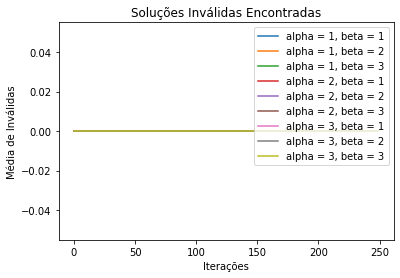

In [9]:
plt.plot(invalidos[0], label="alpha = 1, beta = 1")
plt.plot(invalidos[1], label="alpha = 1, beta = 2")
plt.plot(invalidos[2], label="alpha = 1, beta = 3")
plt.plot(invalidos[3], label="alpha = 2, beta = 1")
plt.plot(invalidos[4], label="alpha = 2, beta = 2")
plt.plot(invalidos[5], label="alpha = 2, beta = 3")
plt.plot(invalidos[6], label="alpha = 3, beta = 1")
plt.plot(invalidos[7], label="alpha = 3, beta = 2")
plt.plot(invalidos[8], label="alpha = 3, beta = 3")
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

In [10]:
print('Solução alfa = 1, beta = 1:', valores[0][-1])
print('Solução alfa = 1, beta = 2:', valores[1][-1])
print('Solução alfa = 1, beta = 3:', valores[2][-1])
print('Solução alfa = 2, beta = 1:', valores[3][-1])
print('Solução alfa = 2, beta = 2:', valores[4][-1])
print('Solução alfa = 2, beta = 3:', valores[5][-1])
print('Solução alfa = 3, beta = 1:', valores[6][-1])
print('Solução alfa = 3, beta = 2:', valores[7][-1])
print('Solução alfa = 3, beta = 3:', valores[8][-1])

Solução alfa = 1, beta = 1: 165.8
Solução alfa = 1, beta = 2: 167.06666666666666
Solução alfa = 1, beta = 3: 167.1
Solução alfa = 2, beta = 1: 164.4
Solução alfa = 2, beta = 2: 166.5
Solução alfa = 2, beta = 3: 167.2
Solução alfa = 3, beta = 1: 163.96666666666667
Solução alfa = 3, beta = 2: 165.93333333333334
Solução alfa = 3, beta = 3: 166.43333333333334


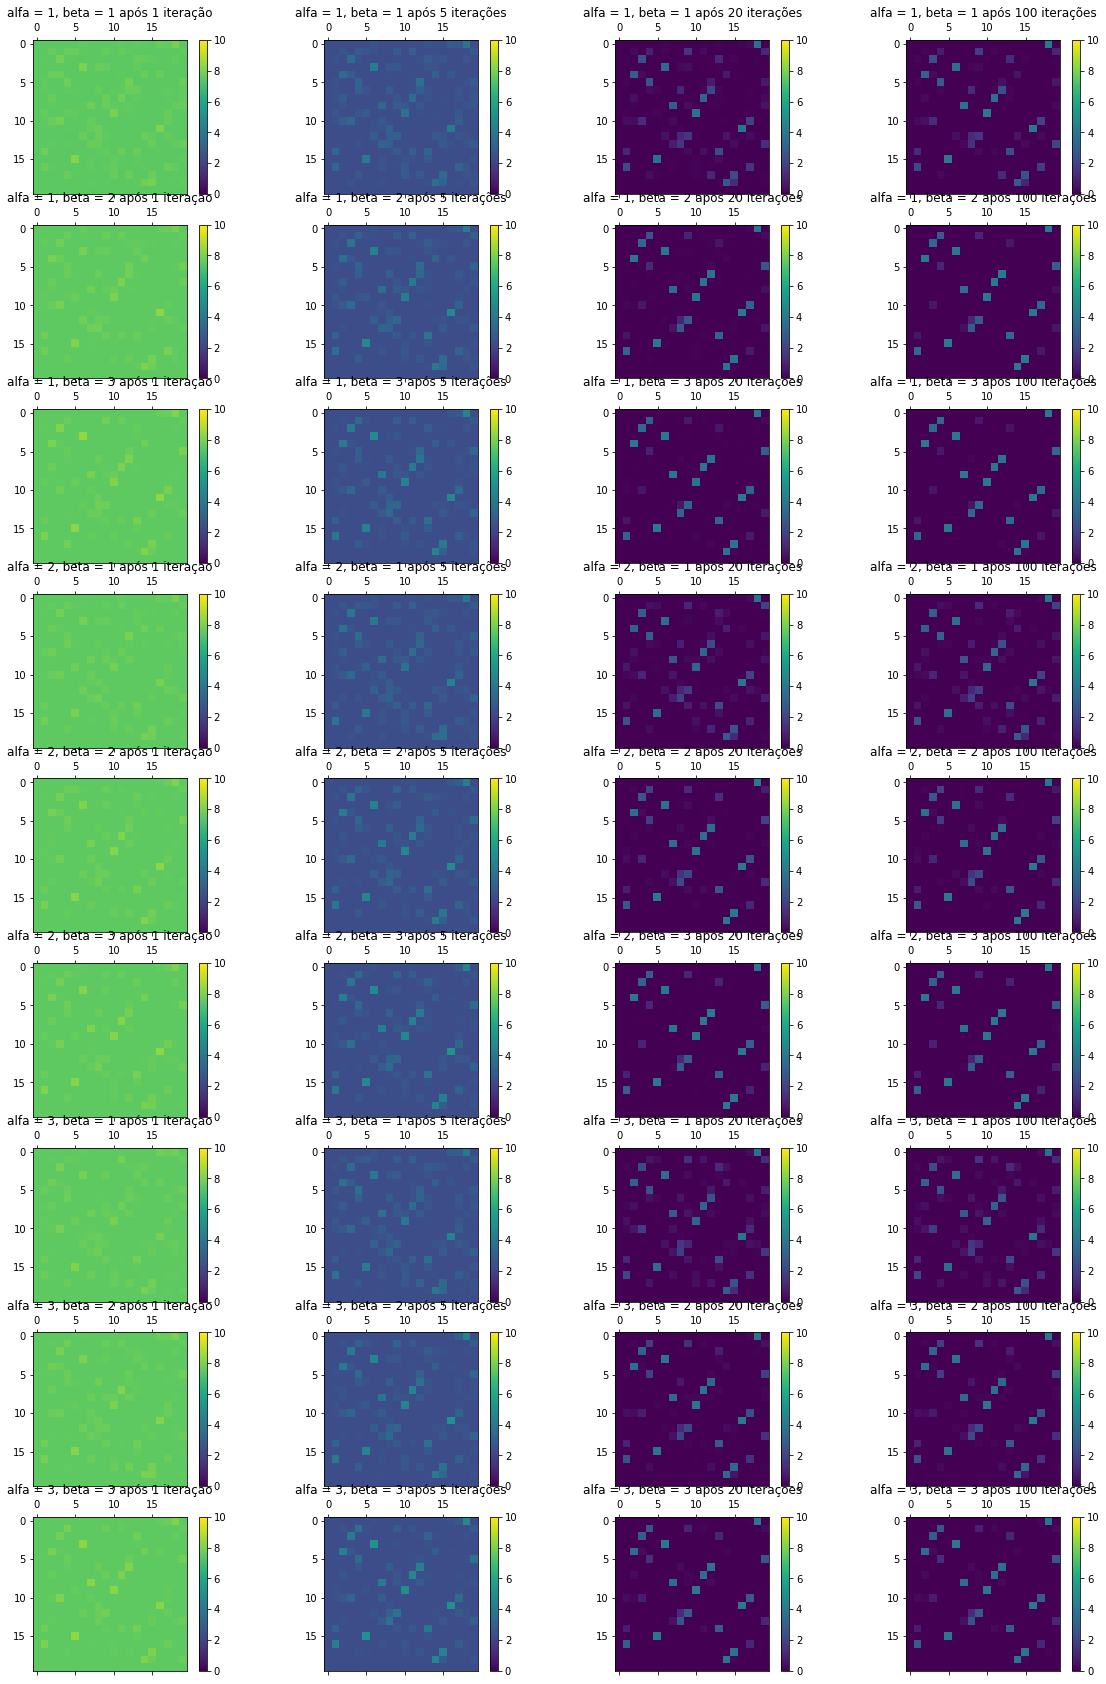

In [11]:
fig, ax = plt.subplots(9, 4, figsize=(20, 30))

m1 = ax[0][0].matshow(matrizes0[0], vmin=0, vmax=10)
ax[0][0].set_title('alfa = 1, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[0][0])

m2 = ax[0][1].matshow(matrizes4[0], vmin=0, vmax=10)
ax[0][1].set_title('alfa = 1, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[0][1])

m3 = ax[0][2].matshow(matrizes19[0], vmin=0, vmax=10)
ax[0][2].set_title('alfa = 1, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[0][2])

m4 = ax[0][3].matshow(matrizes119[0], vmin=0, vmax=10)
ax[0][3].set_title('alfa = 1, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[0][3])

m1 = ax[1][0].matshow(matrizes0[1], vmin=0, vmax=10)
ax[1][0].set_title('alfa = 1, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[1][0])

m2 = ax[1][1].matshow(matrizes4[1], vmin=0, vmax=10)
ax[1][1].set_title('alfa = 1, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[1][1])

m3 = ax[1][2].matshow(matrizes19[1], vmin=0, vmax=10)
ax[1][2].set_title('alfa = 1, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[1][2])

m4 = ax[1][3].matshow(matrizes119[1], vmin=0, vmax=10)
ax[1][3].set_title('alfa = 1, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[1][3])

m1 = ax[2][0].matshow(matrizes0[2], vmin=0, vmax=10)
ax[2][0].set_title('alfa = 1, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[2][0])

m2 = ax[2][1].matshow(matrizes4[2], vmin=0, vmax=10)
ax[2][1].set_title('alfa = 1, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[2][1])

m3 = ax[2][2].matshow(matrizes19[2], vmin=0, vmax=10)
ax[2][2].set_title('alfa = 1, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[2][2])

m4 = ax[2][3].matshow(matrizes119[2], vmin=0, vmax=10)
ax[2][3].set_title('alfa = 1, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[2][3])

m1 = ax[3][0].matshow(matrizes0[3], vmin=0, vmax=10)
ax[3][0].set_title('alfa = 2, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[3][0])

m2 = ax[3][1].matshow(matrizes4[3], vmin=0, vmax=10)
ax[3][1].set_title('alfa = 2, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[3][1])

m3 = ax[3][2].matshow(matrizes19[3], vmin=0, vmax=10)
ax[3][2].set_title('alfa = 2, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[3][2])

m4 = ax[3][3].matshow(matrizes119[3], vmin=0, vmax=10)
ax[3][3].set_title('alfa = 2, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[3][3])

m1 = ax[4][0].matshow(matrizes0[4], vmin=0, vmax=10)
ax[4][0].set_title('alfa = 2, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[4][0])

m2 = ax[4][1].matshow(matrizes4[4], vmin=0, vmax=10)
ax[4][1].set_title('alfa = 2, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[4][1])

m3 = ax[4][2].matshow(matrizes19[4], vmin=0, vmax=10)
ax[4][2].set_title('alfa = 2, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[4][2])

m4 = ax[4][3].matshow(matrizes119[4], vmin=0, vmax=10)
ax[4][3].set_title('alfa = 2, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[4][3])

m1 = ax[5][0].matshow(matrizes0[5], vmin=0, vmax=10)
ax[5][0].set_title('alfa = 2, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[5][0])

m2 = ax[5][1].matshow(matrizes4[5], vmin=0, vmax=10)
ax[5][1].set_title('alfa = 2, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[5][1])

m3 = ax[5][2].matshow(matrizes19[5], vmin=0, vmax=10)
ax[5][2].set_title('alfa = 2, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[5][2])

m4 = ax[5][3].matshow(matrizes119[5], vmin=0, vmax=10)
ax[5][3].set_title('alfa = 2, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[5][3])

m1 = ax[6][0].matshow(matrizes0[6], vmin=0, vmax=10)
ax[6][0].set_title('alfa = 3, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[6][0])

m2 = ax[6][1].matshow(matrizes4[6], vmin=0, vmax=10)
ax[6][1].set_title('alfa = 3, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[6][1])

m3 = ax[6][2].matshow(matrizes19[6], vmin=0, vmax=10)
ax[6][2].set_title('alfa = 3, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[6][2])

m4 = ax[6][3].matshow(matrizes119[6], vmin=0, vmax=10)
ax[6][3].set_title('alfa = 3, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[6][3])

m1 = ax[7][0].matshow(matrizes0[7], vmin=0, vmax=10)
ax[7][0].set_title('alfa = 3, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[7][0])

m2 = ax[7][1].matshow(matrizes4[7], vmin=0, vmax=10)
ax[7][1].set_title('alfa = 3, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[7][1])

m3 = ax[7][2].matshow(matrizes19[7], vmin=0, vmax=10)
ax[7][2].set_title('alfa = 3, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[7][2])

m4 = ax[7][3].matshow(matrizes119[7], vmin=0, vmax=10)
ax[7][3].set_title('alfa = 3, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[7][3])

m1 = ax[8][0].matshow(matrizes0[8], vmin=0, vmax=10)
ax[8][0].set_title('alfa = 3, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[8][0])

m2 = ax[8][1].matshow(matrizes4[8], vmin=0, vmax=10)
ax[8][1].set_title('alfa = 3, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[8][1])

m3 = ax[8][2].matshow(matrizes19[8], vmin=0, vmax=10)
ax[8][2].set_title('alfa = 3, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[8][2])

m4 = ax[8][3].matshow(matrizes119[8], vmin=0, vmax=10)
ax[8][3].set_title('alfa = 3, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[8][3])

plt.show()

# Experimentação para a terceira entrada

## Experimentação Número de Formigas

In [39]:
@jit(forceobj=True)
def ler_output(nome_arquivo, num_nos):
  file = open(nome_arquivo, 'r')
  lines = file.readlines() 
  values = []
  invalidos = []
  matrizes = []
  cont_linha = 0
  for line in lines:
    numeros = line.split(' ')
    if cont_linha == 0 or cont_linha == 4 or cont_linha == 19 or cont_linha == 99 or cont_linha == 199:
      matriz_feromonios = []
      prox = 2
      for i in range(num_nos):
        matriz_feromonios.append([])
        for j in range(num_nos):
          matriz_feromonios[i].append(float(numeros[prox]))
          prox+=1
      matrizes.append(matriz_feromonios)
    invalidos.append(float(numeros[1]))
    values.append(float(numeros[0]))
    cont_linha += 1
  return values, invalidos, matrizes

In [40]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes99_finais = []
    matrizes199_finais = []
    for i in [20, 50, 100]:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        matriz199_final = []
        for j in range(10):
            v, inv, m = ler_output("outputs/num_formigas_entrada3/output_" + str(i) + "_" + str(j) + ".txt", 1000)
            matriz0_final.append(m[0])
            matriz4_final.append(m[1])
            matriz19_final.append(m[2])
            matriz99_final.append(m[3])
            matriz199_final.append(m[4])
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
        
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes99_finais.append(getMeanArray(matriz99_final))
        matrizes199_finais.append(getMeanArray(matriz199_final))
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
    return valores, invalidos, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes99_finais, matrizes199_finais

valores, invalidos, m0, m4, m19, m99, m199 = getValoresFormiga()

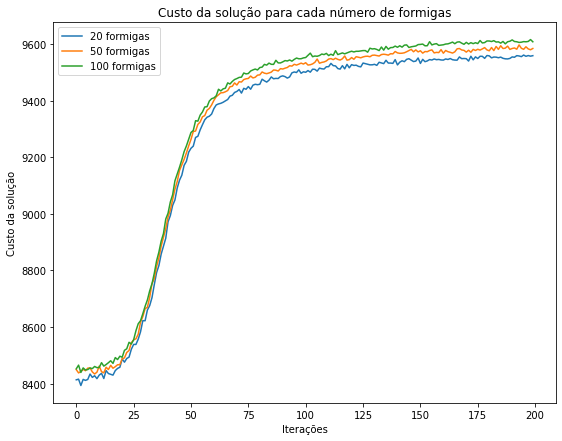

In [41]:
plt.figure(figsize=(9, 7))
plt.plot(valores[0], label='20 formigas')
plt.plot(valores[1], label='50 formigas')
plt.plot(valores[2], label='100 formigas')
plt.xlabel("Iterações")
plt.ylabel("Custo da solução")
plt.title("Custo da solução para cada número de formigas")
plt.legend()
plt.show()

In [42]:
print('Solução 20 formigas =', valores[0][-1])
print('Solução 50 formigas =', valores[1][-1])
print('Solução 100 formigas =', valores[2][-1])

Solução 20 formigas = 9559.3
Solução 50 formigas = 9584.7
Solução 100 formigas = 9608.4


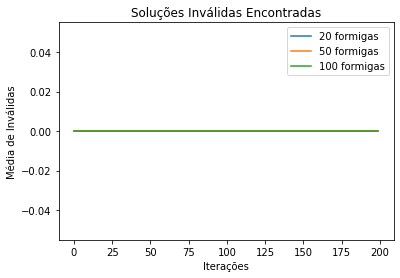

In [43]:
plt.plot(invalidos[0], label='20 formigas')
plt.plot(invalidos[1], label='50 formigas')
plt.plot(invalidos[2], label='100 formigas')
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

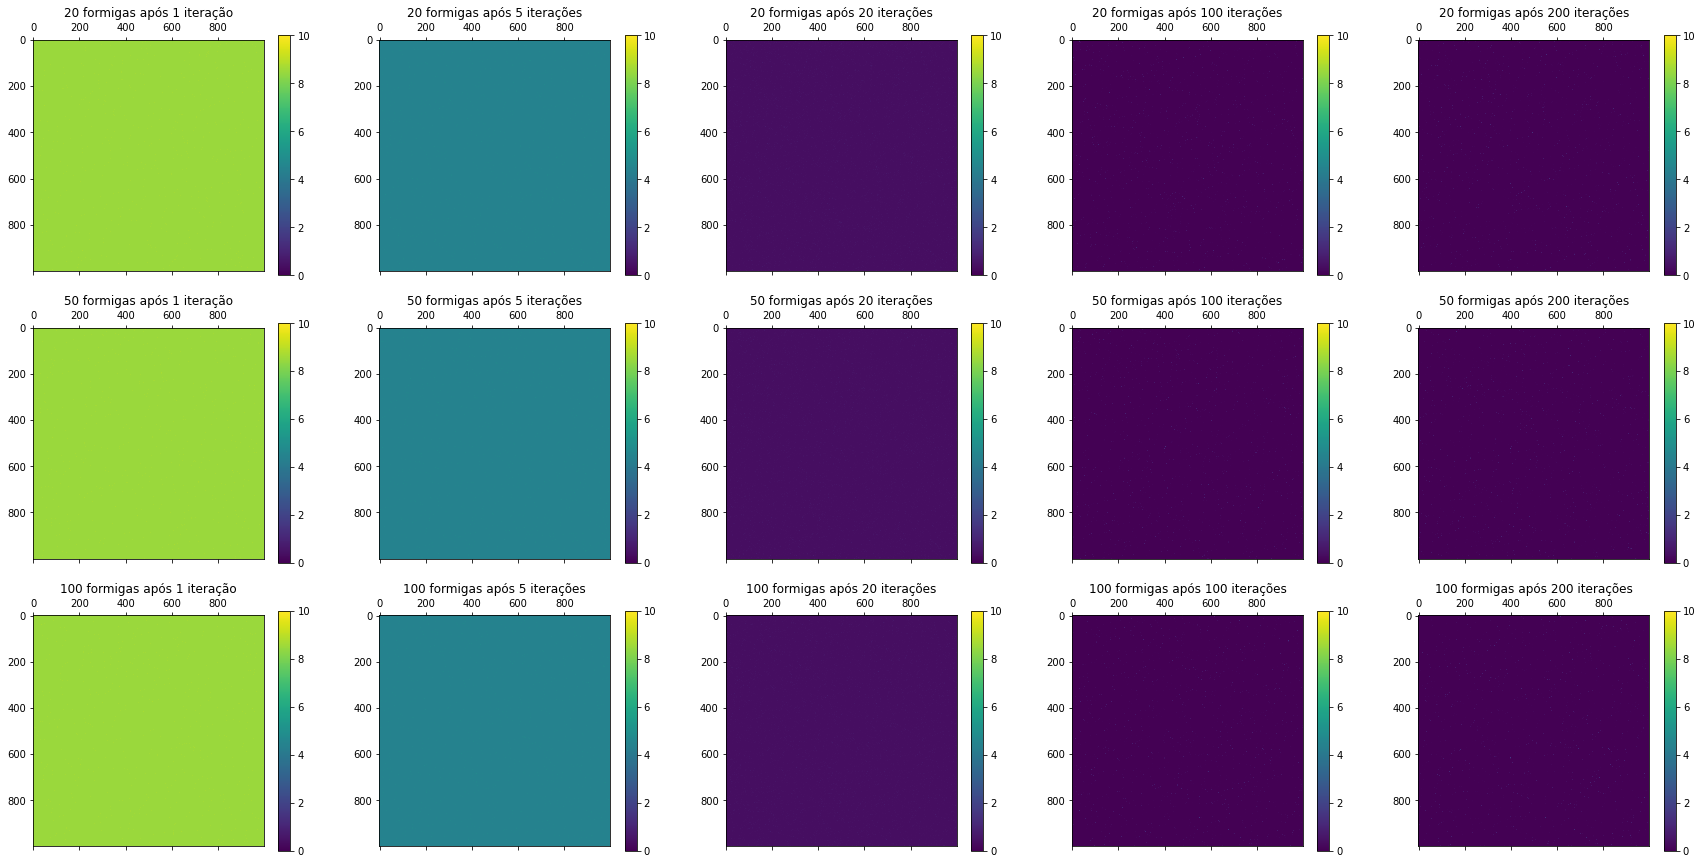

In [45]:
fig, ax = plt.subplots(3, 5, figsize=(30, 15))

ma1 = ax[0][0].matshow(m0[0], vmin=0, vmax=10)
ax[0][0].set_title('20 formigas após 1 iteração')
plt.colorbar(ma1, ax=ax[0][0])

ma2 = ax[0][1].matshow(m4[0], vmin=0, vmax=10)
ax[0][1].set_title('20 formigas após 5 iterações')
plt.colorbar(ma2, ax=ax[0][1])

ma3 = ax[0][2].matshow(m19[0], vmin=0, vmax=10)
ax[0][2].set_title('20 formigas após 20 iterações')
plt.colorbar(ma3, ax=ax[0][2])

ma4 = ax[0][3].matshow(m99[0], vmin=0, vmax=10)
ax[0][3].set_title('20 formigas após 100 iterações')
plt.colorbar(ma4, ax=ax[0][3])

ma5 = ax[0][4].matshow(m199[0], vmin=0, vmax=10)
ax[0][4].set_title('20 formigas após 200 iterações')
plt.colorbar(ma5, ax=ax[0][4])

ma1 = ax[1][0].matshow(m0[1], vmin=0, vmax=10)
ax[1][0].set_title('50 formigas após 1 iteração')
plt.colorbar(ma1, ax=ax[1][0])

ma2 = ax[1][1].matshow(m4[1], vmin=0, vmax=10)
ax[1][1].set_title('50 formigas após 5 iterações')
plt.colorbar(ma2, ax=ax[1][1])

ma3 = ax[1][2].matshow(m19[1], vmin=0, vmax=10)
ax[1][2].set_title('50 formigas após 20 iterações')
plt.colorbar(ma3, ax=ax[1][2])

ma4 = ax[1][3].matshow(m99[1], vmin=0, vmax=10)
ax[1][3].set_title('50 formigas após 100 iterações')
plt.colorbar(ma4, ax=ax[1][3])

ma5 = ax[1][4].matshow(m199[1], vmin=0, vmax=10)
ax[1][4].set_title('50 formigas após 200 iterações')
plt.colorbar(ma5, ax=ax[1][4])

ma1 = ax[2][0].matshow(m0[2], vmin=0, vmax=10)
ax[2][0].set_title('100 formigas após 1 iteração')
plt.colorbar(ma1, ax=ax[2][0])

ma2 = ax[2][1].matshow(m4[2], vmin=0, vmax=10)
ax[2][1].set_title('100 formigas após 5 iterações')
plt.colorbar(ma2, ax=ax[2][1])

ma3 = ax[2][2].matshow(m19[2], vmin=0, vmax=10)
ax[2][2].set_title('100 formigas após 20 iterações')
plt.colorbar(ma3, ax=ax[2][2])

ma4 = ax[2][3].matshow(m99[2], vmin=0, vmax=10)
ax[2][3].set_title('100 formigas após 100 iterações')
plt.colorbar(ma4, ax=ax[2][3])

ma5 = ax[2][4].matshow(m199[2], vmin=0, vmax=10)
ax[2][4].set_title('100 formigas após 200 iterações')
plt.colorbar(ma5, ax=ax[2][4])

plt.show()

## Experimentação Taxa de Evaporação

In [34]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes99_finais = []
    matrizes199_finais = []
    for i in ['0.050000', '0.150000', '0.250000', '0.500000']:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        matriz199_final = []
        for j in range(10):
            v, inv, m = ler_output("outputs/taxa_evap_entrada3/output_" + str(i) + "_" + str(j) + ".txt", 1000)
            matriz0_final.append(m[0])
            matriz4_final.append(m[1])
            matriz19_final.append(m[2])
            matriz99_final.append(m[3])
            matriz199_final.append(m[4])
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
        
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes99_finais.append(getMeanArray(matriz99_final))
        matrizes199_finais.append(getMeanArray(matriz199_final))
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
    return valores, invalidos, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes99_finais, matrizes199_finais

valores, invalidos, m0, m4, m19, m99, m199 = getValoresFormiga()

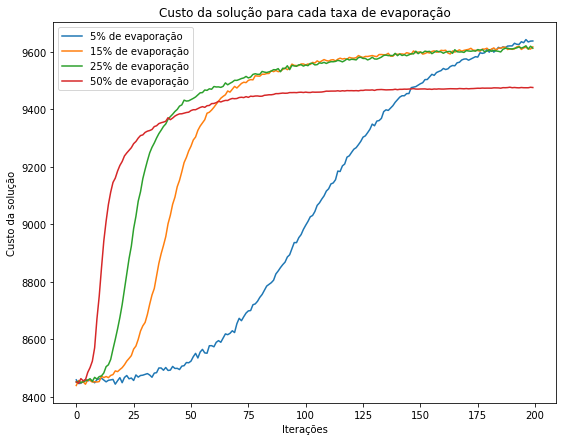

In [35]:
plt.figure(figsize=(9, 7))
plt.plot(valores[0], label='5% de evaporação')
plt.plot(valores[1], label='15% de evaporação')
plt.plot(valores[2], label='25% de evaporação')
plt.plot(valores[3], label='50% de evaporação')
plt.xlabel("Iterações")
plt.ylabel("Custo da solução")
plt.title("Custo da solução para cada taxa de evaporação")
plt.legend()
plt.show()

In [36]:
print('Solução 5% de evaporação =', valores[0][-1])
print('Solução 15% de evaporação =', valores[1][-1])
print('Solução 25% de evaporação =', valores[2][-1])
print('Solução 50% de evaporação =', valores[3][-1])

Solução 5% de evaporação = 9637.0
Solução 15% de evaporação = 9616.4
Solução 25% de evaporação = 9611.9
Solução 50% de evaporação = 9475.2


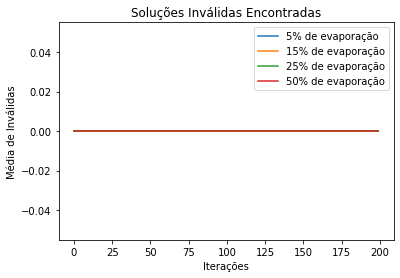

In [37]:
plt.plot(invalidos[0], label='5% de evaporação')
plt.plot(invalidos[1], label='15% de evaporação')
plt.plot(invalidos[2], label='25% de evaporação')
plt.plot(invalidos[3], label='50% de evaporação')
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

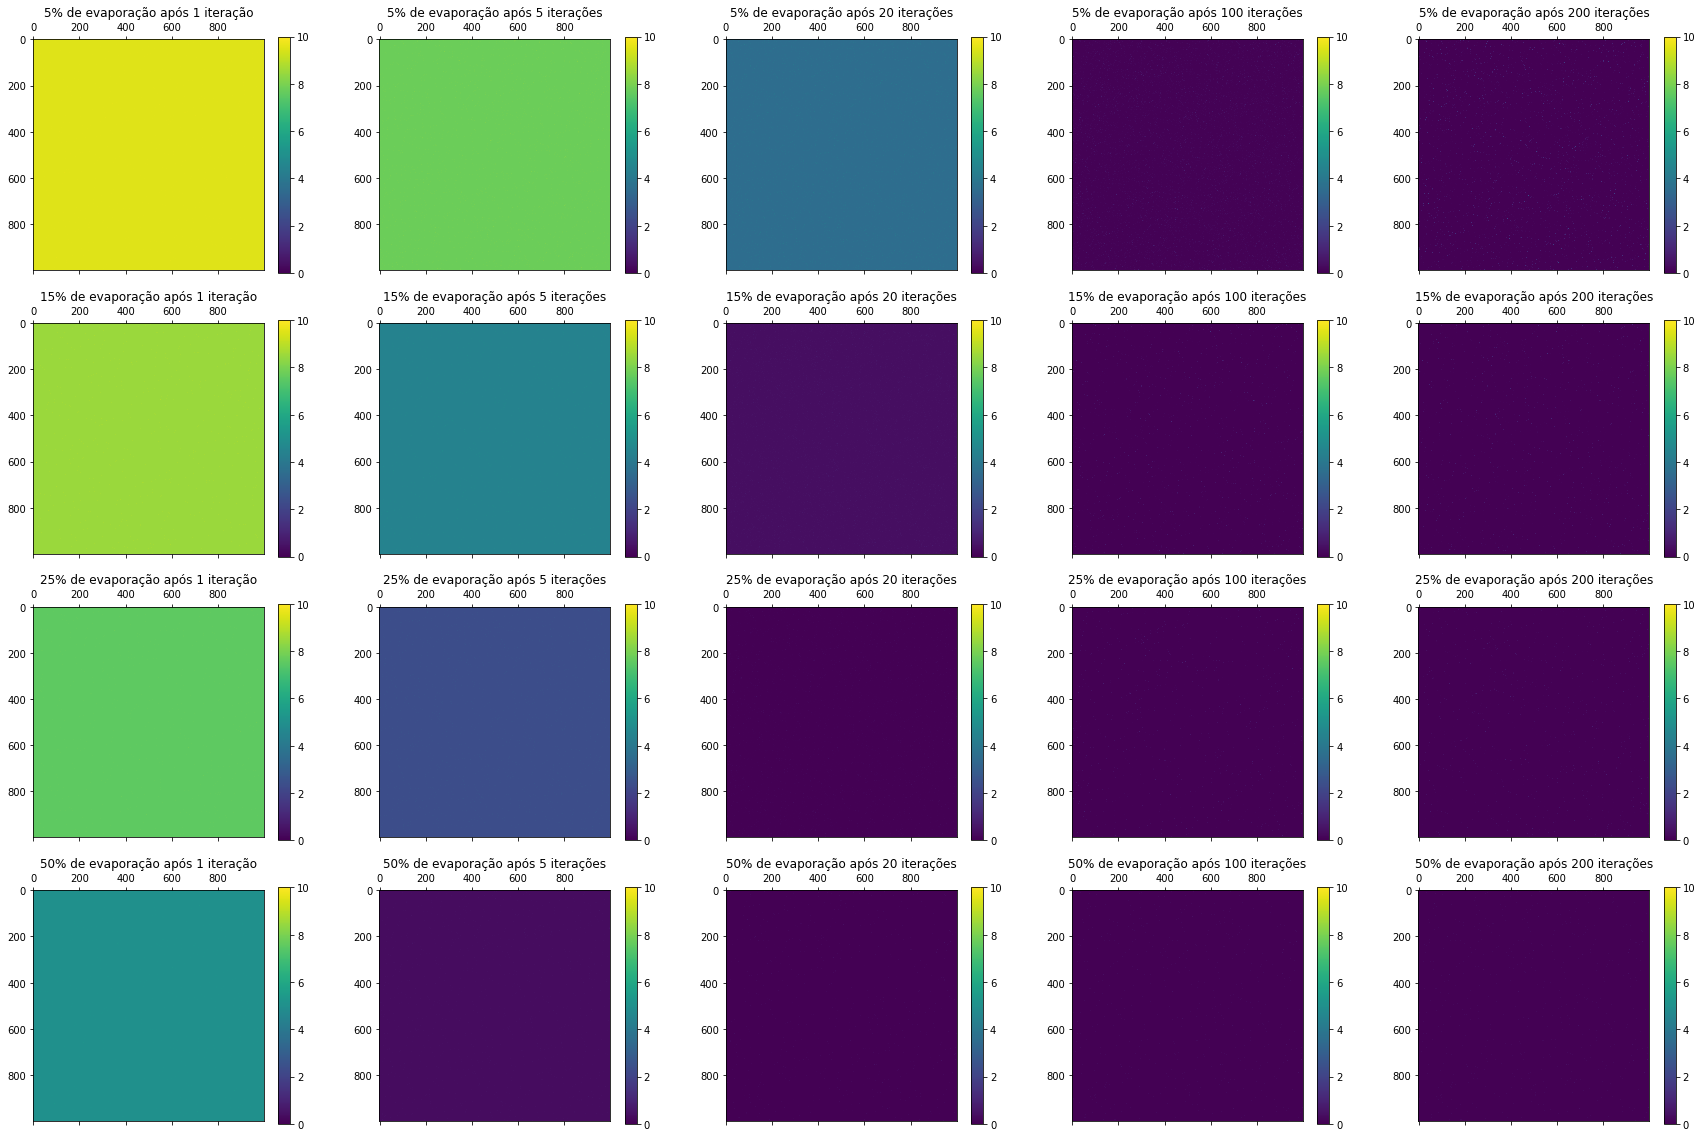

In [38]:
fig, ax = plt.subplots(4, 5, figsize=(30, 20))

ma1 = ax[0][0].matshow(m0[0], vmin=0, vmax=10)
ax[0][0].set_title('5% de evaporação após 1 iteração')
plt.colorbar(ma1, ax=ax[0][0])

ma2 = ax[0][1].matshow(m4[0], vmin=0, vmax=10)
ax[0][1].set_title('5% de evaporação após 5 iterações')
plt.colorbar(ma2, ax=ax[0][1])

ma3 = ax[0][2].matshow(m19[0], vmin=0, vmax=10)
ax[0][2].set_title('5% de evaporação após 20 iterações')
plt.colorbar(ma3, ax=ax[0][2])

ma4 = ax[0][3].matshow(m99[0], vmin=0, vmax=10)
ax[0][3].set_title('5% de evaporação após 100 iterações')
plt.colorbar(ma4, ax=ax[0][3])

ma5 = ax[0][4].matshow(m199[0], vmin=0, vmax=10)
ax[0][4].set_title('5% de evaporação após 200 iterações')
plt.colorbar(ma5, ax=ax[0][4])

ma1 = ax[1][0].matshow(m0[1], vmin=0, vmax=10)
ax[1][0].set_title('15% de evaporação após 1 iteração')
plt.colorbar(ma1, ax=ax[1][0])

ma2 = ax[1][1].matshow(m4[1], vmin=0, vmax=10)
ax[1][1].set_title('15% de evaporação após 5 iterações')
plt.colorbar(ma2, ax=ax[1][1])

ma3 = ax[1][2].matshow(m19[1], vmin=0, vmax=10)
ax[1][2].set_title('15% de evaporação após 20 iterações')
plt.colorbar(ma3, ax=ax[1][2])

ma4 = ax[1][3].matshow(m99[1], vmin=0, vmax=10)
ax[1][3].set_title('15% de evaporação após 100 iterações')
plt.colorbar(ma4, ax=ax[1][3])

ma5 = ax[1][4].matshow(m199[1], vmin=0, vmax=10)
ax[1][4].set_title('15% de evaporação após 200 iterações')
plt.colorbar(ma5, ax=ax[1][4])

ma1 = ax[2][0].matshow(m0[2], vmin=0, vmax=10)
ax[2][0].set_title('25% de evaporação após 1 iteração')
plt.colorbar(ma1, ax=ax[2][0])

ma2 = ax[2][1].matshow(m4[2], vmin=0, vmax=10)
ax[2][1].set_title('25% de evaporação após 5 iterações')
plt.colorbar(ma2, ax=ax[2][1])

ma3 = ax[2][2].matshow(m19[2], vmin=0, vmax=10)
ax[2][2].set_title('25% de evaporação após 20 iterações')
plt.colorbar(ma3, ax=ax[2][2])

ma4 = ax[2][3].matshow(m99[2], vmin=0, vmax=10)
ax[2][3].set_title('25% de evaporação após 100 iterações')
plt.colorbar(ma4, ax=ax[2][3])

ma5 = ax[2][4].matshow(m199[2], vmin=0, vmax=10)
ax[2][4].set_title('25% de evaporação após 200 iterações')
plt.colorbar(ma5, ax=ax[2][4])

ma1 = ax[3][0].matshow(m0[3], vmin=0, vmax=10)
ax[3][0].set_title('50% de evaporação após 1 iteração')
plt.colorbar(ma1, ax=ax[3][0])

ma2 = ax[3][1].matshow(m4[3], vmin=0, vmax=10)
ax[3][1].set_title('50% de evaporação após 5 iterações')
plt.colorbar(ma2, ax=ax[3][1])

ma3 = ax[3][2].matshow(m19[3], vmin=0, vmax=10)
ax[3][2].set_title('50% de evaporação após 20 iterações')
plt.colorbar(ma3, ax=ax[3][2])

ma4 = ax[3][3].matshow(m99[3], vmin=0, vmax=10)
ax[3][3].set_title('50% de evaporação após 100 iterações')
plt.colorbar(ma4, ax=ax[3][3])

ma5 = ax[3][4].matshow(m199[3], vmin=0, vmax=10)
ax[3][4].set_title('50% de evaporação após 200 iterações')
plt.colorbar(ma5, ax=ax[3][4])

plt.show()

## Experimentação para os valores de alfa e beta

In [57]:
@jit(forceobj=True)
def getMeanArray(valores_formiga):
    return np.mean(valores_formiga, axis=0)

@jit(forceobj=True)
def getValoresFormiga():
    valores = []
    invalidos = []
    matrizes0_finais = []
    matrizes4_finais = []
    matrizes19_finais = []
    matrizes99_finais = []
    matrizes199_finais = []
    for i in [(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]:
        valores_formiga = []
        invalidos_formiga = []
        matriz0_final = []
        matriz4_final = []
        matriz19_final = []
        matriz99_final = []
        matriz199_final = []
        for j in range(10):
            v, inv, m = ler_output("outputs/alfa_beta_entrada3/output_" + str(i[0]) + "_" + str(i[1]) + "_" + str(j) + ".txt", 100)
            valores_formiga.append(v)
            invalidos_formiga.append(inv)
            matriz0_final.append(m[0])
            matriz4_final.append(m[1])
            matriz19_final.append(m[2])
            matriz99_final.append(m[3])
            matriz199_final.append(m[4])
        
        valores.append(getMeanArray(valores_formiga))
        invalidos.append(getMeanArray(invalidos_formiga))
        matrizes0_finais.append(getMeanArray(matriz0_final))
        matrizes4_finais.append(getMeanArray(matriz4_final))
        matrizes19_finais.append(getMeanArray(matriz19_final))
        matrizes99_finais.append(getMeanArray(matriz99_final))
        matrizes199_finais.append(getMeanArray(matriz199_final))
    return valores, matrizes0_finais, matrizes4_finais, matrizes19_finais, matrizes99_finais, matrizes199_finais, invalidos

valores, matrizes0, matrizes4, matrizes19, matrizes99, matrizes199, invalidos = getValoresFormiga()

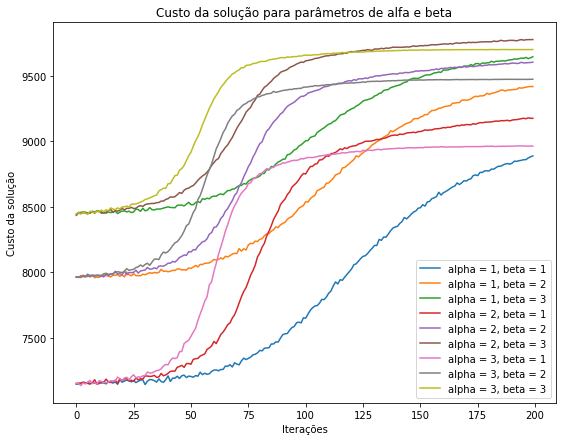

In [62]:
plt.figure(figsize=(9, 7))
plt.plot(valores[0], label="alpha = 1, beta = 1")
plt.plot(valores[1], label="alpha = 1, beta = 2")
plt.plot(valores[2], label="alpha = 1, beta = 3")
plt.plot(valores[3], label="alpha = 2, beta = 1")
plt.plot(valores[4], label="alpha = 2, beta = 2")
plt.plot(valores[5], label="alpha = 2, beta = 3")
plt.plot(valores[6], label="alpha = 3, beta = 1")
plt.plot(valores[7], label="alpha = 3, beta = 2")
plt.plot(valores[8], label="alpha = 3, beta = 3")
plt.xlabel("Iterações")
plt.ylabel("Custo da solução")
plt.title("Custo da solução para parâmetros de alfa e beta")
plt.legend()
plt.show()

(9, 200)


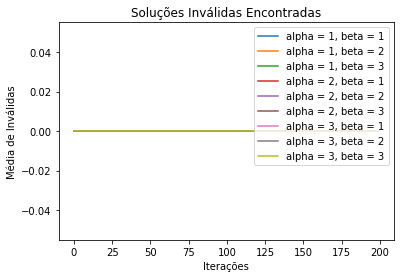

In [59]:
print(np.array(invalidos).shape)
plt.plot(invalidos[0], label="alpha = 1, beta = 1")
plt.plot(invalidos[1], label="alpha = 1, beta = 2")
plt.plot(invalidos[2], label="alpha = 1, beta = 3")
plt.plot(invalidos[3], label="alpha = 2, beta = 1")
plt.plot(invalidos[4], label="alpha = 2, beta = 2")
plt.plot(invalidos[5], label="alpha = 2, beta = 3")
plt.plot(invalidos[6], label="alpha = 3, beta = 1")
plt.plot(invalidos[7], label="alpha = 3, beta = 2")
plt.plot(invalidos[8], label="alpha = 3, beta = 3")
plt.xlabel("Iterações")
plt.ylabel("Média de Inválidas")
plt.title("Soluções Inválidas Encontradas")
plt.legend()
plt.show()

In [60]:
print('Solução alfa = 1, beta = 1:', valores[0][-1])
print('Solução alfa = 1, beta = 2:', valores[1][-1])
print('Solução alfa = 1, beta = 3:', valores[2][-1])
print('Solução alfa = 2, beta = 1:', valores[3][-1])
print('Solução alfa = 2, beta = 2:', valores[4][-1])
print('Solução alfa = 2, beta = 3:', valores[5][-1])
print('Solução alfa = 3, beta = 1:', valores[6][-1])
print('Solução alfa = 3, beta = 2:', valores[7][-1])
print('Solução alfa = 3, beta = 3:', valores[8][-1])

Solução alfa = 1, beta = 1: 8888.2
Solução alfa = 1, beta = 2: 9417.7
Solução alfa = 1, beta = 3: 9645.3
Solução alfa = 2, beta = 1: 9175.3
Solução alfa = 2, beta = 2: 9603.9
Solução alfa = 2, beta = 3: 9776.5
Solução alfa = 3, beta = 1: 8962.6
Solução alfa = 3, beta = 2: 9473.6
Solução alfa = 3, beta = 3: 9700.8


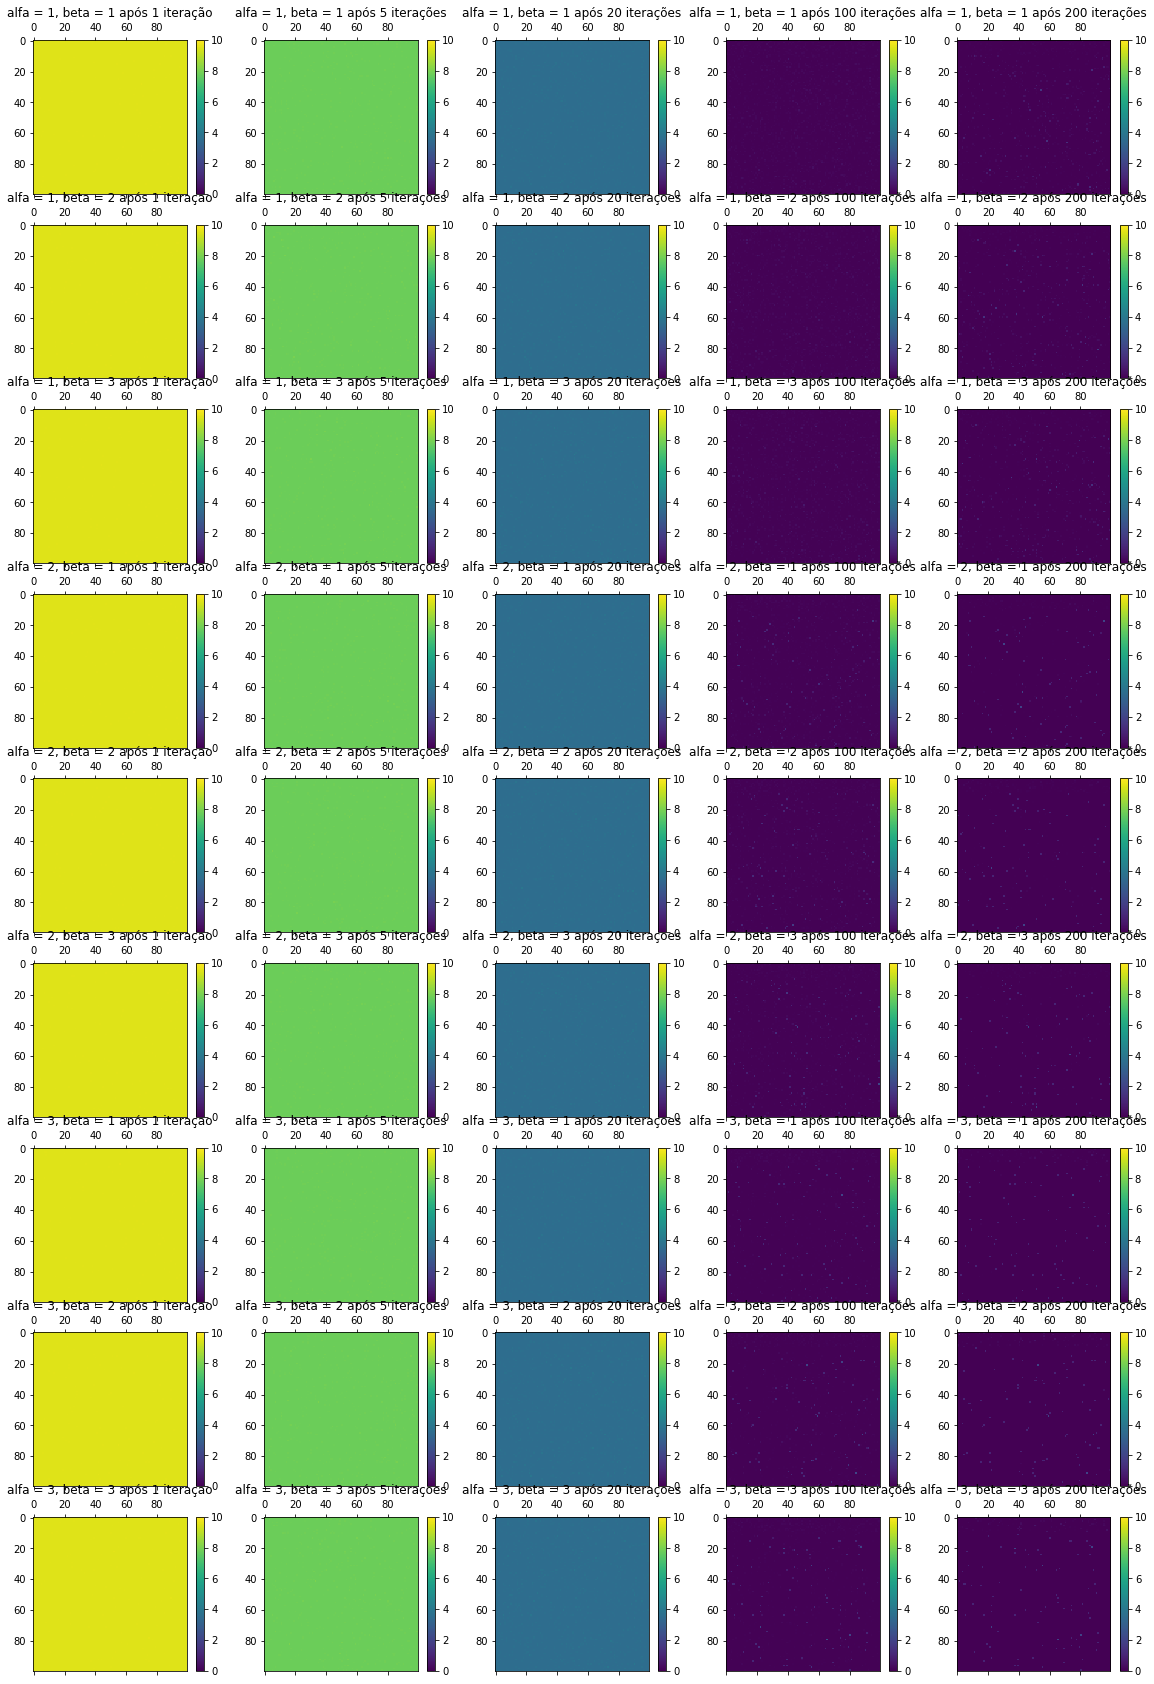

In [61]:
fig, ax = plt.subplots(9, 5, figsize=(20, 30))

m1 = ax[0][0].matshow(matrizes0[0], vmin=0, vmax=10)
ax[0][0].set_title('alfa = 1, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[0][0])

m2 = ax[0][1].matshow(matrizes4[0], vmin=0, vmax=10)
ax[0][1].set_title('alfa = 1, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[0][1])

m3 = ax[0][2].matshow(matrizes19[0], vmin=0, vmax=10)
ax[0][2].set_title('alfa = 1, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[0][2])

m4 = ax[0][3].matshow(matrizes99[0], vmin=0, vmax=10)
ax[0][3].set_title('alfa = 1, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[0][3])

m5 = ax[0][4].matshow(matrizes199[0], vmin=0, vmax=10)
ax[0][4].set_title('alfa = 1, beta = 1 após 200 iterações')
plt.colorbar(m5, ax=ax[0][4])

m1 = ax[1][0].matshow(matrizes0[1], vmin=0, vmax=10)
ax[1][0].set_title('alfa = 1, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[1][0])

m2 = ax[1][1].matshow(matrizes4[1], vmin=0, vmax=10)
ax[1][1].set_title('alfa = 1, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[1][1])

m3 = ax[1][2].matshow(matrizes19[1], vmin=0, vmax=10)
ax[1][2].set_title('alfa = 1, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[1][2])

m4 = ax[1][3].matshow(matrizes99[1], vmin=0, vmax=10)
ax[1][3].set_title('alfa = 1, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[1][3])

m5 = ax[1][4].matshow(matrizes199[1], vmin=0, vmax=10)
ax[1][4].set_title('alfa = 1, beta = 2 após 200 iterações')
plt.colorbar(m5, ax=ax[1][4])

m1 = ax[2][0].matshow(matrizes0[2], vmin=0, vmax=10)
ax[2][0].set_title('alfa = 1, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[2][0])

m2 = ax[2][1].matshow(matrizes4[2], vmin=0, vmax=10)
ax[2][1].set_title('alfa = 1, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[2][1])

m3 = ax[2][2].matshow(matrizes19[2], vmin=0, vmax=10)
ax[2][2].set_title('alfa = 1, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[2][2])

m4 = ax[2][3].matshow(matrizes99[2], vmin=0, vmax=10)
ax[2][3].set_title('alfa = 1, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[2][3])

m5 = ax[2][4].matshow(matrizes199[2], vmin=0, vmax=10)
ax[2][4].set_title('alfa = 1, beta = 3 após 200 iterações')
plt.colorbar(m5, ax=ax[2][4])

m1 = ax[3][0].matshow(matrizes0[3], vmin=0, vmax=10)
ax[3][0].set_title('alfa = 2, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[3][0])

m2 = ax[3][1].matshow(matrizes4[3], vmin=0, vmax=10)
ax[3][1].set_title('alfa = 2, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[3][1])

m3 = ax[3][2].matshow(matrizes19[3], vmin=0, vmax=10)
ax[3][2].set_title('alfa = 2, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[3][2])

m4 = ax[3][3].matshow(matrizes99[3], vmin=0, vmax=10)
ax[3][3].set_title('alfa = 2, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[3][3])

m5 = ax[3][4].matshow(matrizes199[3], vmin=0, vmax=10)
ax[3][4].set_title('alfa = 2, beta = 1 após 200 iterações')
plt.colorbar(m5, ax=ax[3][4])

m1 = ax[4][0].matshow(matrizes0[4], vmin=0, vmax=10)
ax[4][0].set_title('alfa = 2, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[4][0])

m2 = ax[4][1].matshow(matrizes4[4], vmin=0, vmax=10)
ax[4][1].set_title('alfa = 2, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[4][1])

m3 = ax[4][2].matshow(matrizes19[4], vmin=0, vmax=10)
ax[4][2].set_title('alfa = 2, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[4][2])

m4 = ax[4][3].matshow(matrizes99[4], vmin=0, vmax=10)
ax[4][3].set_title('alfa = 2, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[4][3])

m5 = ax[4][4].matshow(matrizes199[4], vmin=0, vmax=10)
ax[4][4].set_title('alfa = 2, beta = 2 após 200 iterações')
plt.colorbar(m5, ax=ax[4][4])

m1 = ax[5][0].matshow(matrizes0[5], vmin=0, vmax=10)
ax[5][0].set_title('alfa = 2, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[5][0])

m2 = ax[5][1].matshow(matrizes4[5], vmin=0, vmax=10)
ax[5][1].set_title('alfa = 2, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[5][1])

m3 = ax[5][2].matshow(matrizes19[5], vmin=0, vmax=10)
ax[5][2].set_title('alfa = 2, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[5][2])

m4 = ax[5][3].matshow(matrizes99[5], vmin=0, vmax=10)
ax[5][3].set_title('alfa = 2, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[5][3])

m5 = ax[5][4].matshow(matrizes199[5], vmin=0, vmax=10)
ax[5][4].set_title('alfa = 2, beta = 3 após 200 iterações')
plt.colorbar(m5, ax=ax[5][4])

m1 = ax[6][0].matshow(matrizes0[6], vmin=0, vmax=10)
ax[6][0].set_title('alfa = 3, beta = 1 após 1 iteração')
plt.colorbar(m1, ax=ax[6][0])

m2 = ax[6][1].matshow(matrizes4[6], vmin=0, vmax=10)
ax[6][1].set_title('alfa = 3, beta = 1 após 5 iterações')
plt.colorbar(m2, ax=ax[6][1])

m3 = ax[6][2].matshow(matrizes19[6], vmin=0, vmax=10)
ax[6][2].set_title('alfa = 3, beta = 1 após 20 iterações')
plt.colorbar(m3, ax=ax[6][2])

m4 = ax[6][3].matshow(matrizes99[6], vmin=0, vmax=10)
ax[6][3].set_title('alfa = 3, beta = 1 após 100 iterações')
plt.colorbar(m4, ax=ax[6][3])

m5 = ax[6][4].matshow(matrizes199[6], vmin=0, vmax=10)
ax[6][4].set_title('alfa = 3, beta = 1 após 200 iterações')
plt.colorbar(m5, ax=ax[6][4])

m1 = ax[7][0].matshow(matrizes0[7], vmin=0, vmax=10)
ax[7][0].set_title('alfa = 3, beta = 2 após 1 iteração')
plt.colorbar(m1, ax=ax[7][0])

m2 = ax[7][1].matshow(matrizes4[7], vmin=0, vmax=10)
ax[7][1].set_title('alfa = 3, beta = 2 após 5 iterações')
plt.colorbar(m2, ax=ax[7][1])

m3 = ax[7][2].matshow(matrizes19[7], vmin=0, vmax=10)
ax[7][2].set_title('alfa = 3, beta = 2 após 20 iterações')
plt.colorbar(m3, ax=ax[7][2])

m4 = ax[7][3].matshow(matrizes99[7], vmin=0, vmax=10)
ax[7][3].set_title('alfa = 3, beta = 2 após 100 iterações')
plt.colorbar(m4, ax=ax[7][3])

m5 = ax[7][4].matshow(matrizes199[7], vmin=0, vmax=10)
ax[7][4].set_title('alfa = 3, beta = 2 após 200 iterações')
plt.colorbar(m5, ax=ax[7][4])

m1 = ax[8][0].matshow(matrizes0[8], vmin=0, vmax=10)
ax[8][0].set_title('alfa = 3, beta = 3 após 1 iteração')
plt.colorbar(m1, ax=ax[8][0])

m2 = ax[8][1].matshow(matrizes4[8], vmin=0, vmax=10)
ax[8][1].set_title('alfa = 3, beta = 3 após 5 iterações')
plt.colorbar(m2, ax=ax[8][1])

m3 = ax[8][2].matshow(matrizes19[8], vmin=0, vmax=10)
ax[8][2].set_title('alfa = 3, beta = 3 após 20 iterações')
plt.colorbar(m3, ax=ax[8][2])

m4 = ax[8][3].matshow(matrizes99[8], vmin=0, vmax=10)
ax[8][3].set_title('alfa = 3, beta = 3 após 100 iterações')
plt.colorbar(m4, ax=ax[8][3])

m5 = ax[8][4].matshow(matrizes199[8], vmin=0, vmax=10)
ax[8][4].set_title('alfa = 3, beta = 3 após 200 iterações')
plt.colorbar(m5, ax=ax[8][4])

plt.show()